# Test for ABC with updating prior

## Simulation and ABC Method

I simulated 10 "chromosomes", where "chromosome" is the 100 times smaller than the human chromosome size. For example, we simulated "chromosome 1" with a length of 2491634.
I simulated a model with 3 populations (A, B, C), where populations A and B diverge at time AB_t, A and C diverge at time AC_t, and A changes in population size at time AN_t. I used the uniform priors of
```
A = (10^4.0:10^5.0)
B = (10^3.0:10^6.7)
C = (10^4.0:10^6.7)
AB_t = (1600:4100)
AC_t = (1600:4100)
AN_t = (0:4100)
AN = (10^3.0:10^4.0)
```
I used the following workflow:
1. I simulated chromosome 1 117,770 times.
2. Randomly pick "observed" parameter values from simulations.
3. Transform summary statistics to PLS components.
4. Perform ABC to approximate marginal posterior densities for each parameter, and joint posterior for the effective population size of B and C.
   - 100 retained simulations for truncated prior
   - 100 points for the marginal posterior densities
   - Dirac peak of 0.01.
5. Use the marginal posterior densities as prior for the next chromosome.
6. Simulate the next chromosome ~10,000 times based on the prior created from the previous posterior.
7. Repeat steps 3-5 until chromsome 10 complete.
8. Repeat steps 2-6 100 times.

## Assessment of ABC results

In [1]:
import pandas as pd
from ggplot import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

ModuleNotFoundError: No module named 'ggplot'

Combine results into one dataframe

In [2]:
def create_combined_df(file_name):
    combined_df = pd.read_csv(file_name, sep='\t')
    combined_df['obs_str'] = combined_df['obs'].astype(str)
    combined_df['chr_str'] = combined_df['chr'].astype(str)
    return combined_df

In [3]:
results_path = '.'
combined_PosteriorCharacteristics_observed_name = '{}/ABC_update_estimate_10pls_100ret_model0_MarginalPosteriorCharacteristics_combined.txt'.format(results_path)
combined_PosteriorDensities_name = '{}/ABC_update_estimate_10pls_100ret_model0_MarginalPosteriorDensities_Obs0_combined.txt'.format(results_path)

obs_list = list(range(1, 101))
chrom_list = list(range(1, 11))

if os.path.isfile(combined_PosteriorCharacteristics_observed_name) and os.path.isfile(combined_PosteriorDensities_name):
    combined_PosteriorCharacteristics_observed_df = create_combined_df(combined_PosteriorCharacteristics_observed_name)
    combined_PosteriorDensities_df = create_combined_df(combined_PosteriorDensities_name)                            
else:
    print('{} or {} does not exist')
    exit()
parameters = list(combined_PosteriorCharacteristics_observed_df)[0:7]

In [4]:
combined_PosteriorCharacteristics_observed_df.head()

A             B             C           AN         AB_t  \
0  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
1  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
2  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
3  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
4  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   

          AC_t         AN_t   A_mode   A_mean  A_median   ...     \
0  1998.433504  1481.963069  60907.6  57157.6   59181.3   ...      
1  1998.433504  1481.963069  61816.6  61122.5   62427.9   ...      
2  1998.433504  1481.963069  89997.4  75189.0   77290.8   ...      
3  1998.433504  1481.963069  85745.9  72687.7   74628.7   ...      
4  1998.433504  1481.963069  78620.4  69933.6   72841.7   ...      

   AN_t_HDI90_upper  AN_t_HDI95_lower  AN_t_HDI95_upper  AN_t_HDI99_lower  \
0           1756.14           405.281           1884.33           186.370   
1           1550.37           805.273           1623.64           688.144   
2           1566.12           990.729           1620.74           893.121   
3           1468.58          1012.750           1504.55           931.787   
4           1590.11          1111.500           1623.25          1026.670   

   AN_t_HDI99_upper  B_C_prob  obs  chr  obs_str  chr_str  
0           2123.00  0.692954    1    1        1        1  
1           1767.84  0.658456    1    2        1        2  
2           1724.54  0.636651    1    3        1        3  
3           1576.54  0.686551    1    4        1        4  
4           1685.83  0.704441    1    5        1        5  

[5 rows x 145 columns]

In [5]:
combined_PosteriorDensities_df.head()

number        A   density          B     density.1         C     density.2  \
0       1  10000.4  0.000005    1089.52  2.742700e-08   10199.0  1.876910e-07   
1       2  10909.5  0.000005   51703.50  3.147420e-08   60711.1  2.031000e-07   
2       3  11818.5  0.000006  102317.00  3.588020e-08  111223.0  2.181410e-07   
3       4  12727.6  0.000006  152931.00  4.063100e-08  161735.0  2.325900e-07   
4       5  13636.6  0.000006  203545.00  4.570300e-08  212248.0  2.462330e-07   

        AN     density.3     AB_t     density.4     AC_t  density.5  \
0  1000.36  2.567090e-10  1600.03  2.124900e-20  1600.02   0.000913   
1  1091.26  7.912280e-10  1625.28  7.952850e-20  1625.27   0.001116   
2  1182.17  2.326940e-09  1650.53  2.906300e-19  1650.52   0.001334   
3  1273.07  6.569500e-09  1675.79  1.037070e-18  1675.78   0.001558   
4  1363.98  1.790230e-08  1701.04  3.613580e-18  1701.03   0.001780   

         AN_t  density.6  obs  chr obs_str chr_str  
0    0.008756   0.000009    1    1       1       1  
1   41.422400   0.000013    1    1       1       1  
2   82.836100   0.000018    1    1       1       1  
3  124.250000   0.000025    1    1       1       1  
4  165.663000   0.000034    1    1       1       1

Functions to calculate things

In [64]:
def calc_estimate_dist(param, combined_PosteriorCharacteristics_observed_df):
    estimate = '{}_mode'.format(param)
    estimate_dist_name = '{}_estimate_dist'.format(param)
    combined_PosteriorCharacteristics_observed_df[estimate_dist_name] = (combined_PosteriorCharacteristics_observed_df[estimate] - combined_PosteriorCharacteristics_observed_df[param])**2
    combined_PosteriorCharacteristics_observed_df.head()
    return combined_PosteriorCharacteristics_observed_df


def calc_HPDI_dist(param, combined_PosteriorCharacteristics_observed_df):
    HDI95_upper_name = '{}_HDI95_upper'.format(param)
    HDI95_lower_name = '{}_HDI95_lower'.format(param)
    HPDI_dist_name = '{}_HPDI_dist'.format(param)
    HDI95_upper = combined_PosteriorCharacteristics_observed_df[HDI95_upper_name]
    HDI95_lower = combined_PosteriorCharacteristics_observed_df[HDI95_lower_name]
    true = combined_PosteriorCharacteristics_observed_df[param]
    
    combined_PosteriorCharacteristics_observed_df[HPDI_dist_name] = np.where((true < HDI95_lower) & (true > HDI95_upper), ((true - HDI95_lower)**2 + (true - HDI95_upper)**2)*(-1), (true - HDI95_lower)**2 + (true - HDI95_upper)**2)    
    return combined_PosteriorCharacteristics_observed_df


def calc_estimate_ratio(param, combined_PosteriorCharacteristics_observed_df):
    ratio_name = '{}_estimate_ratio'.format(param)
    estimate = '{}_mode'.format(param)
    combined_PosteriorCharacteristics_observed_df[ratio_name] = combined_PosteriorCharacteristics_observed_df[estimate]/combined_PosteriorCharacteristics_observed_df[param]
    return combined_PosteriorCharacteristics_observed_df


def calc_HPDI_ratio(param, combined_PosteriorCharacteristics_observed_df):
    ratio_upper_name = '{}_HPDI95_upper_ratio'.format(param)
    ratio_lower_name = '{}_HPDI95_lower_ratio'.format(param)
    dist_ratio_name = '{}_HPDI95_dist_ratio'.format(param)
    HDI95_upper_name = '{}_HDI95_upper'.format(param)
    HDI95_lower_name = '{}_HDI95_lower'.format(param)
    combined_PosteriorCharacteristics_observed_df[ratio_upper_name] = combined_PosteriorCharacteristics_observed_df[HDI95_upper_name]/combined_PosteriorCharacteristics_observed_df[param]
    combined_PosteriorCharacteristics_observed_df[ratio_lower_name] = combined_PosteriorCharacteristics_observed_df[HDI95_lower_name]/combined_PosteriorCharacteristics_observed_df[param]
    combined_PosteriorCharacteristics_observed_df[dist_ratio_name] = combined_PosteriorCharacteristics_observed_df[ratio_upper_name] - combined_PosteriorCharacteristics_observed_df[ratio_lower_name]
    return combined_PosteriorCharacteristics_observed_df


def proportion_smaller_chr1(df, dist_column, chrom, param):
    proportion_smaller_dict = {}
    chr1 = df[dist_column].loc[(df['chr_str'] == '1')].reset_index(drop=True)
    other_chr = df[dist_column].loc[(df['chr_str'] == str(chrom))].reset_index(drop=True)

    proportion = (float(sum(chr1 > other_chr) - sum(chr1 < 0)))/100
    proportion_smaller_dict['chr'] = int(chrom)
    proportion_smaller_dict['param'] = param
    proportion_smaller_dict['proportion'] = proportion
    return proportion_smaller_dict

In [7]:
combined_PosteriorCharacteristics_observed_df['B-C'] = combined_PosteriorCharacteristics_observed_df['B'] - combined_PosteriorCharacteristics_observed_df['C']
for param in parameters:
    combined_PosteriorCharacteristics_observed_df = calc_estimate_dist(param, combined_PosteriorCharacteristics_observed_df)
    combined_PosteriorCharacteristics_observed_df = calc_HPDI_dist(param, combined_PosteriorCharacteristics_observed_df)
    combined_PosteriorCharacteristics_observed_df = calc_estimate_ratio(param, combined_PosteriorCharacteristics_observed_df)
    combined_PosteriorCharacteristics_observed_df = calc_HPDI_ratio(param, combined_PosteriorCharacteristics_observed_df)
combined_PosteriorCharacteristics_observed_df.head()

A             B             C           AN         AB_t  \
0  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
1  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
2  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
3  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
4  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   

          AC_t         AN_t   A_mode   A_mean  A_median  \
0  1998.433504  1481.963069  60907.6  57157.6   59181.3   
1  1998.433504  1481.963069  61816.6  61122.5   62427.9   
2  1998.433504  1481.963069  89997.4  75189.0   77290.8   
3  1998.433504  1481.963069  85745.9  72687.7   74628.7   
4  1998.433504  1481.963069  78620.4  69933.6   72841.7   

            ...            AC_t_estimate_ratio  AC_t_HPDI95_upper_ratio  \
0           ...                       0.926996                 1.070869   
1           ...                       0.924699                 1.037277   
2           ...                       0.936443                 1.041726   
3           ...                       0.961713                 1.065009   
4           ...                       0.970380                 1.073736   

   AC_t_HPDI95_lower_ratio  AC_t_HPDI95_dist_ratio  AN_t_estimate_dist  \
0                 0.800637                0.270232       164189.527273   
1                 0.811981                0.225296        79176.431621   
2                 0.827443                0.214283        30280.548245   
3                 0.871062                0.193947        49864.260705   
4                 0.882271                0.191465         9536.121920   

   AN_t_HPDI_dist  AN_t_estimate_ratio  AN_t_HPDI95_upper_ratio  \
0    1.321143e+06             0.726577                 1.271509   
1    4.779818e+05             0.810128                 1.095601   
2    2.605699e+05             0.882579                 1.093644   
3    2.206711e+05             0.849319                 1.015241   
4    1.572049e+05             0.934106                 1.095338   

   AN_t_HPDI95_lower_ratio  AN_t_HPDI95_dist_ratio  
0                 0.273476                0.998034  
1                 0.543383                0.552218  
2                 0.668525                0.425119  
3                 0.683384                0.331857  
4                 0.750019                0.345319  

[5 rows x 188 columns]

Functions to plot things

In [57]:
def boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, y_axis_name):
    plot = ggplot(aes(x = 'chr', y = y_axis_name), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_boxplot() + \
        theme_bw()
    return plot


def lineplot(param, combined_PosteriorCharacteristics_observed_df, y_axis_name):
    plot = ggplot(aes(x = 'chr', y = y_axis_name, colour='obs_str'), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_point() + \
        geom_line() + \
        theme_bw()
    return plot


def regplot(y_axis_name, df):
    plot = sns.lmplot(x="chr", y=y_axis_name, 
               size=5, 
               data=df, 
               lowess=True)
    return plot


def distribution_plot(param, combined_PosteriorCharacteristics_observed_df, x_axis_name):
    plot = ggplot(aes(x = x_axis_name, colour='chr_str'), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_density() + \
        geom_vline(x = 1) + \
        scale_color_brewer(type='div', palette=2) + \
        theme_bw()
    return plot


def density_plot(param, PosteriorDensities_df, true_value):
    density = list(PosteriorDensities_obs1_df)[PosteriorDensities_obs1_df.columns.get_loc(param)+1]
    plot = ggplot(aes(x = param, y = density, colour = 'chr_str'), data = PosteriorDensities_df) + \
        geom_line(size = 2) + \
        geom_vline(x = true_value, size = 3, colour = 'black') + \
        scale_color_brewer(type='div', palette=2) + \
        theme_bw()
    return plot


def lineplot2(df):
    plot = ggplot(aes(x = 'chr', y = 'proportion', colour='param'), data = proportion_df) + \
        geom_point() + \
        geom_line(size = 2) + \
        geom_hline(y = 0.5, linetype = 'dashed', color = 'black', size = 2) + \
        ylim(0,1) + \
        scale_color_brewer(type='div', palette=2) + \
        theme_bw()
    return plot

### Parameter Estimates

#### Proportion of estimates and on chromosomes >1 closer to true value than chr1

If the prior updating scheme improved the parameter estimates, we would expect the proportion of the estimates closer to the true estimates than the distance of chromosome 1 to increase.

Across the parameters, there is not a clear trend that as the chromosomes increase, the proportion of parameter estimates improve substantially. 

In [65]:
df_list = []
for chrom in range(2, 11):
    for param in parameters:
        estimate_dist_name = '{}_estimate_dist'.format(param)
        proportion_smaller_dict = proportion_smaller_chr1(combined_PosteriorCharacteristics_observed_df, estimate_dist_name, str(chrom), param)
        df_chrom = pd.DataFrame(proportion_smaller_dict, index = [0])
        df_list.append(df_chrom)
proportion_df = pd.concat(df_list)

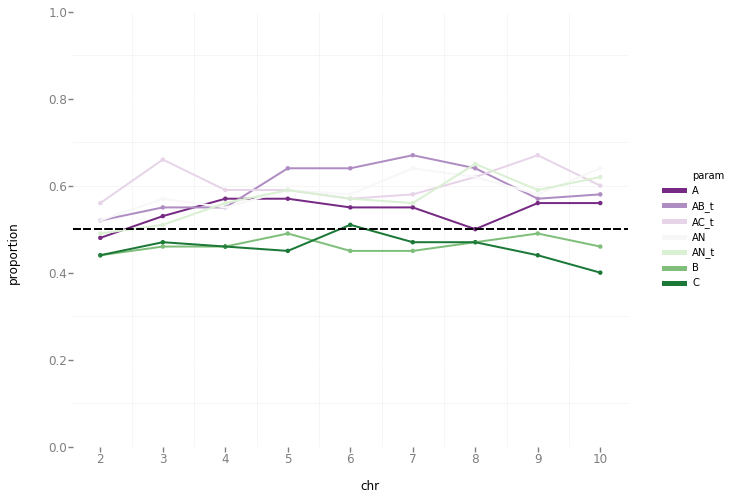

<ggplot: (-9223372029304151187)>


In [66]:
plot = lineplot2(proportion_df)
print(plot)

#### Ratio of parameter estimate to true value
$E/T$

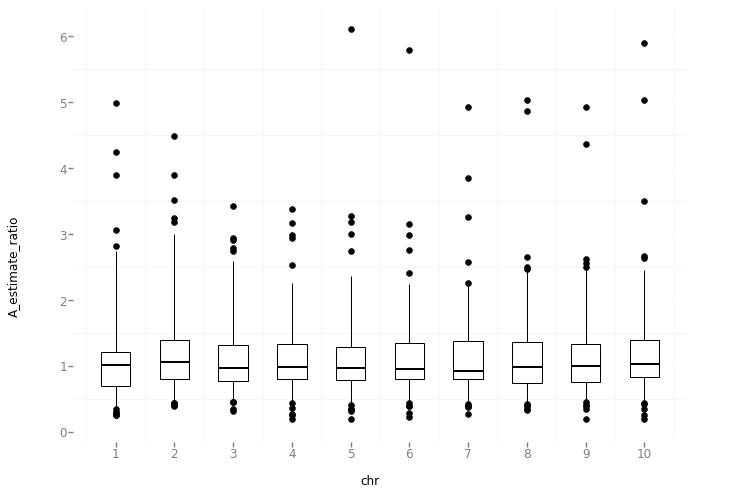

<ggplot: (287569465)>


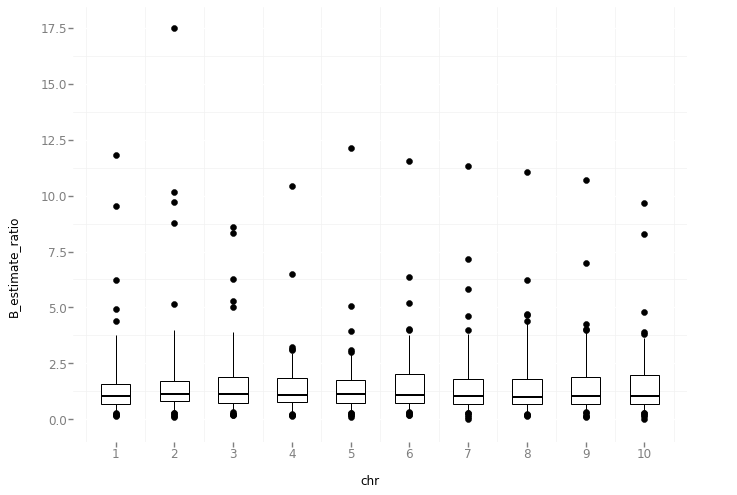

<ggplot: (-9223372036564467098)>


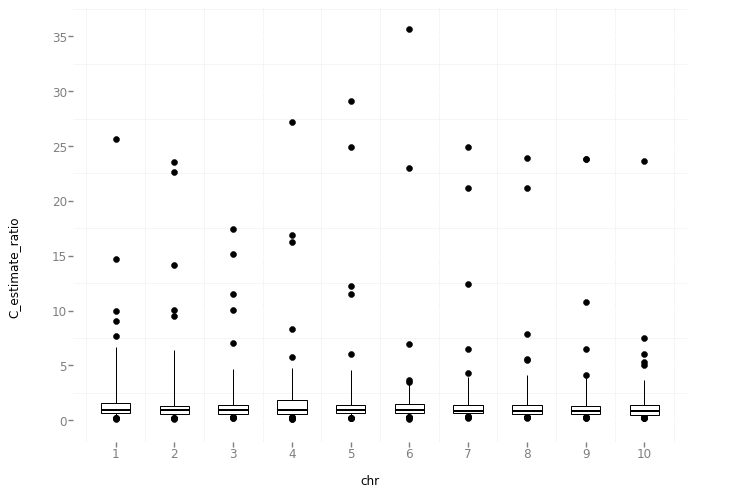

<ggplot: (7549477391)>


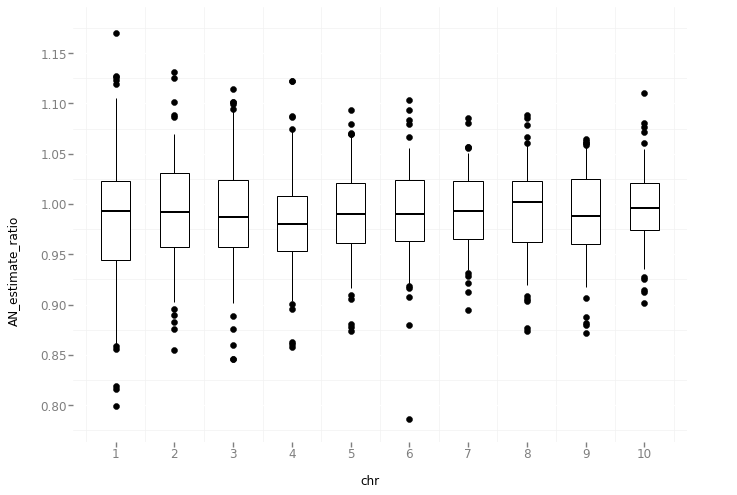

<ggplot: (7549329384)>


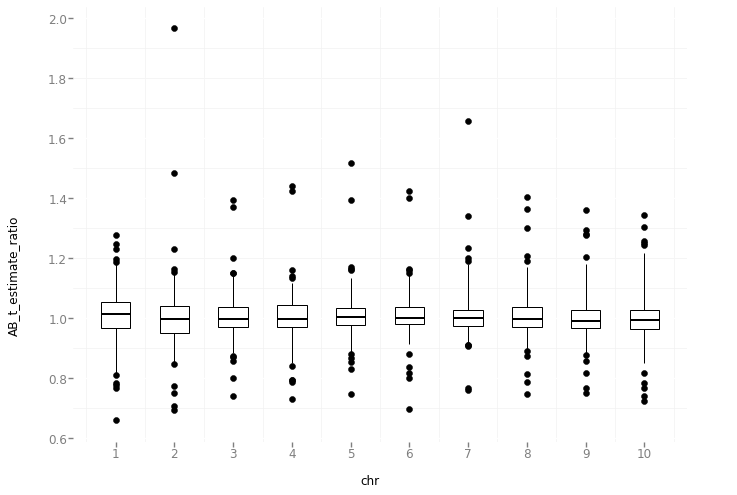

<ggplot: (-9223372029305301588)>


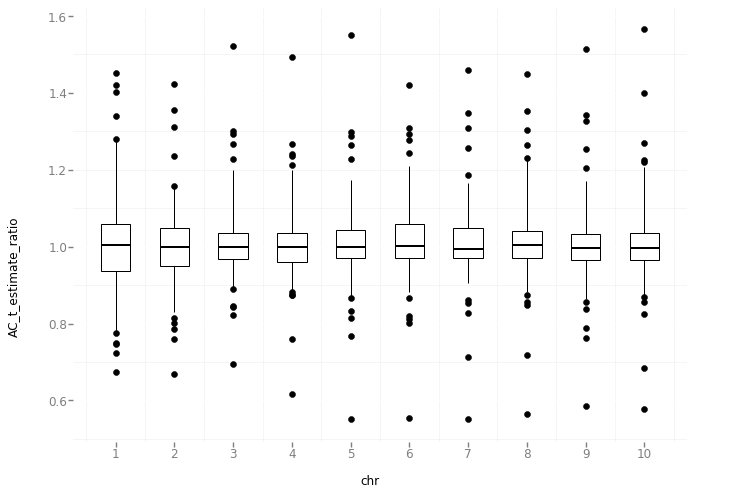

<ggplot: (-9223372036567587759)>


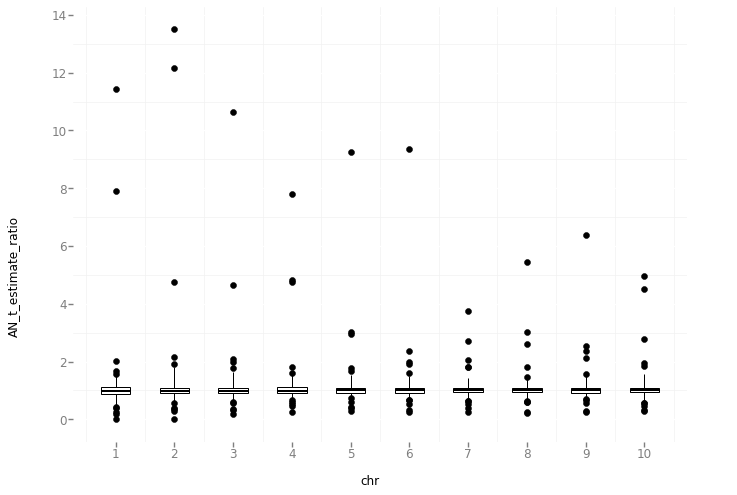

<ggplot: (-9223372036567403071)>


In [10]:
for param in parameters:
    estimate_ratio_name = '{}_estimate_ratio'.format(param)
    plot = boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, estimate_ratio_name)
    print(plot)

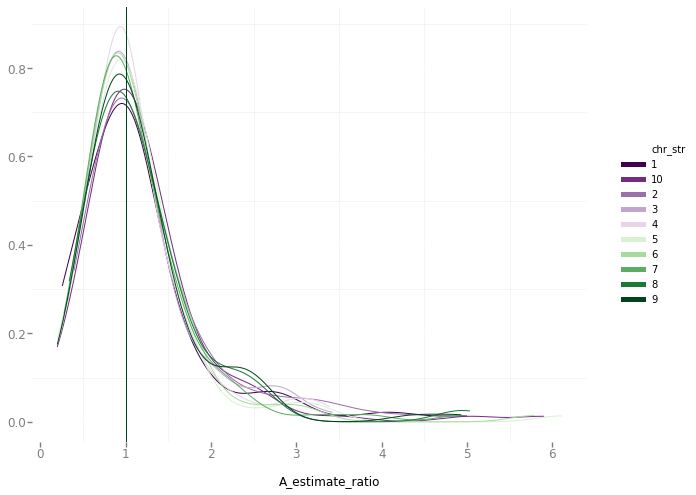

<ggplot: (7549478383)>


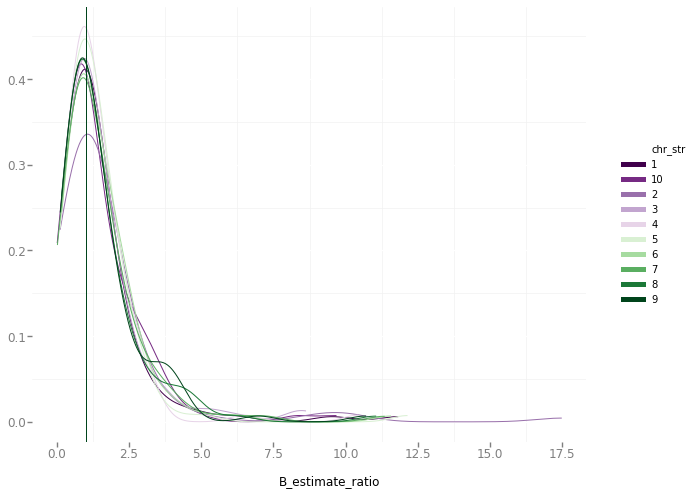

<ggplot: (7550549263)>


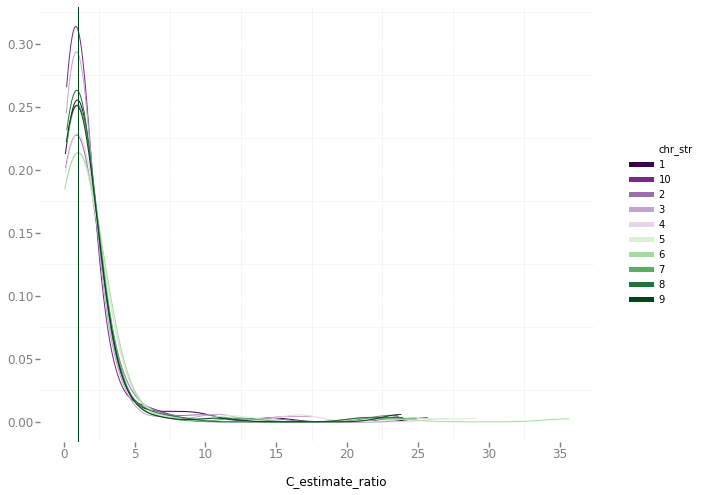

<ggplot: (-9223372029304087594)>


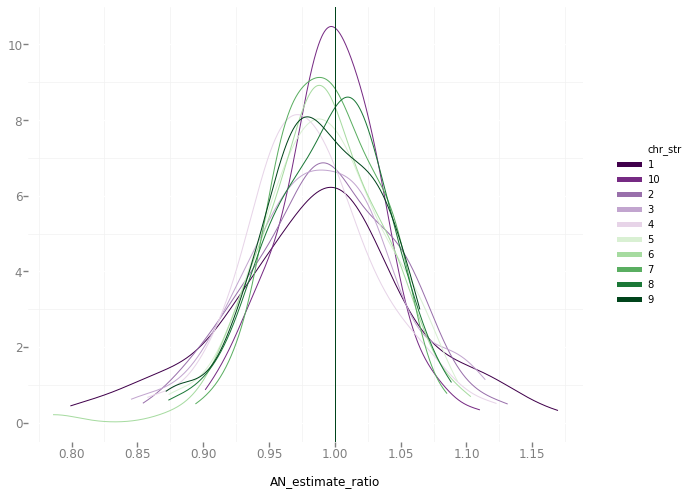

<ggplot: (7550947525)>


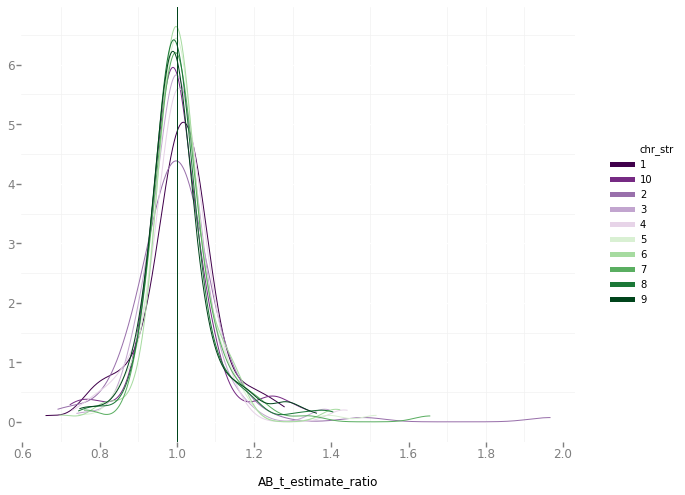

<ggplot: (-9223372029304226409)>


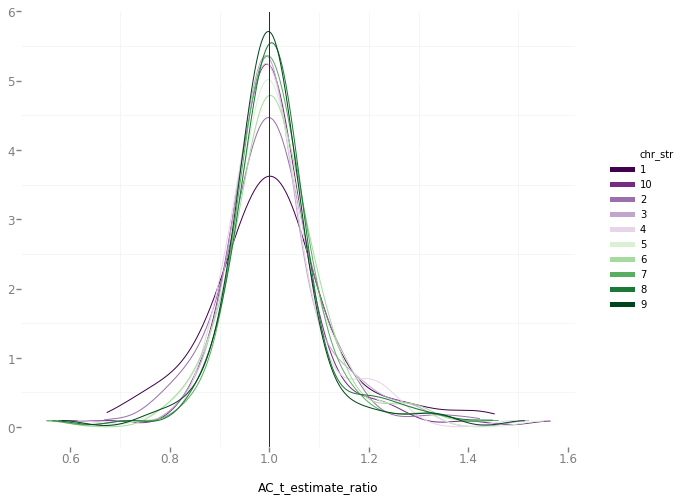

<ggplot: (7549477398)>


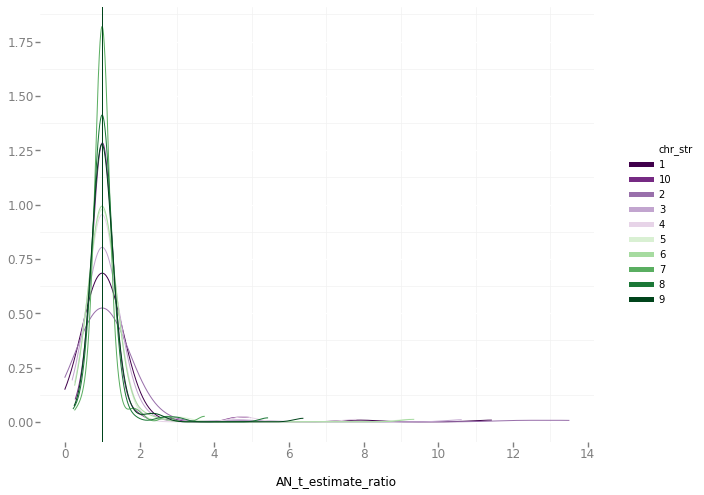

<ggplot: (293203660)>


In [11]:
for param in parameters:
    estimate_ratio_name = '{}_estimate_ratio'.format(param)
    plot = distribution_plot(param, combined_PosteriorCharacteristics_observed_df, estimate_ratio_name)
    print(plot)

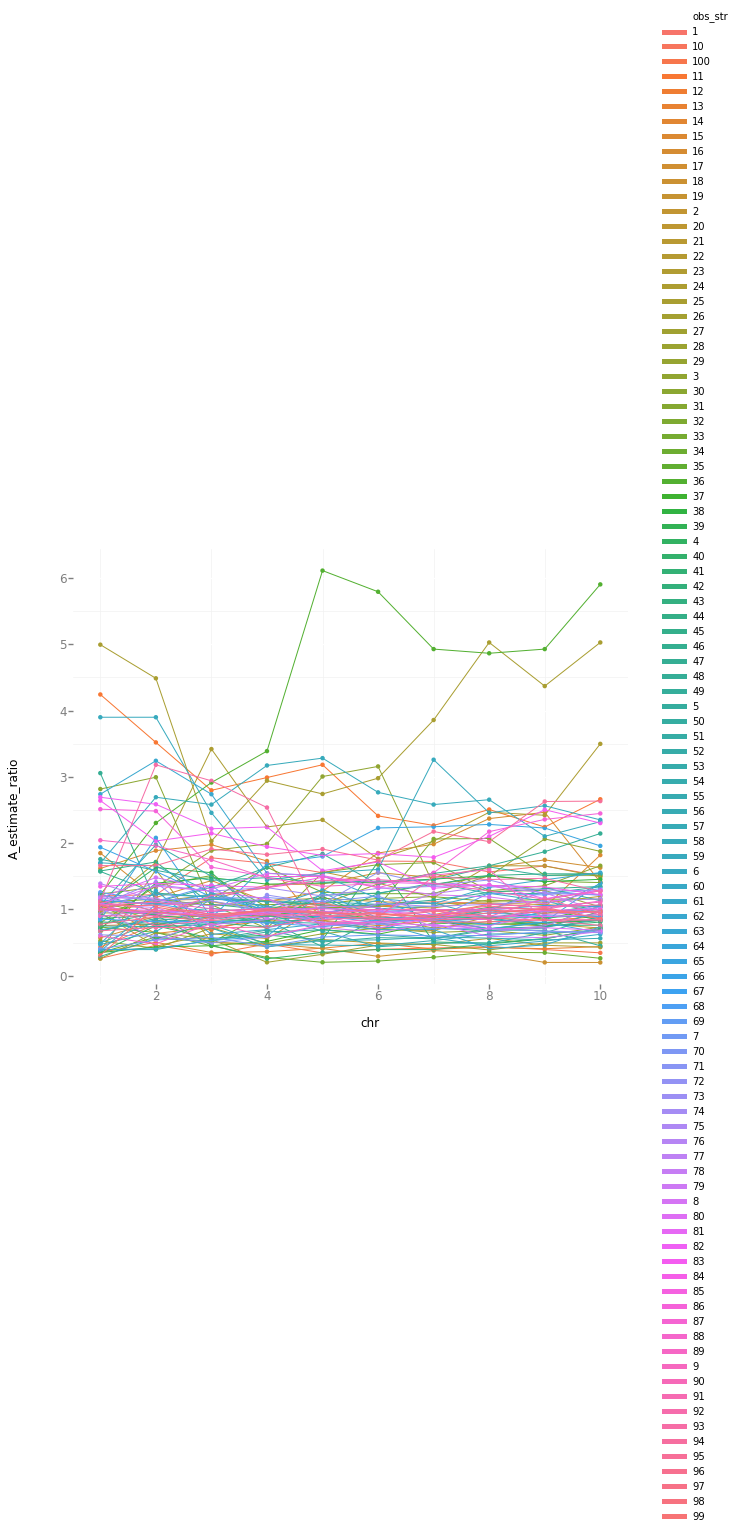

<ggplot: (7566169187)>


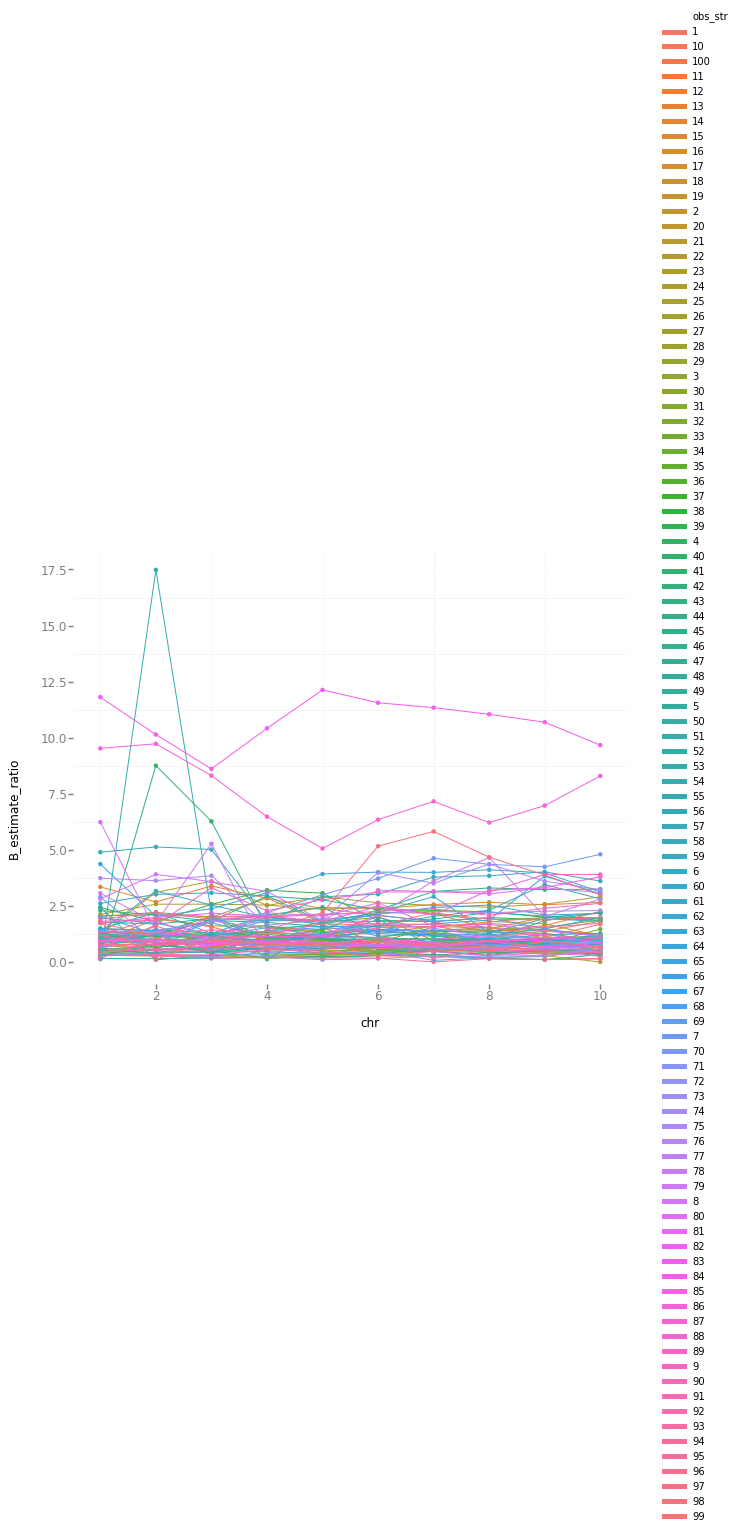

<ggplot: (-9223372029296728625)>


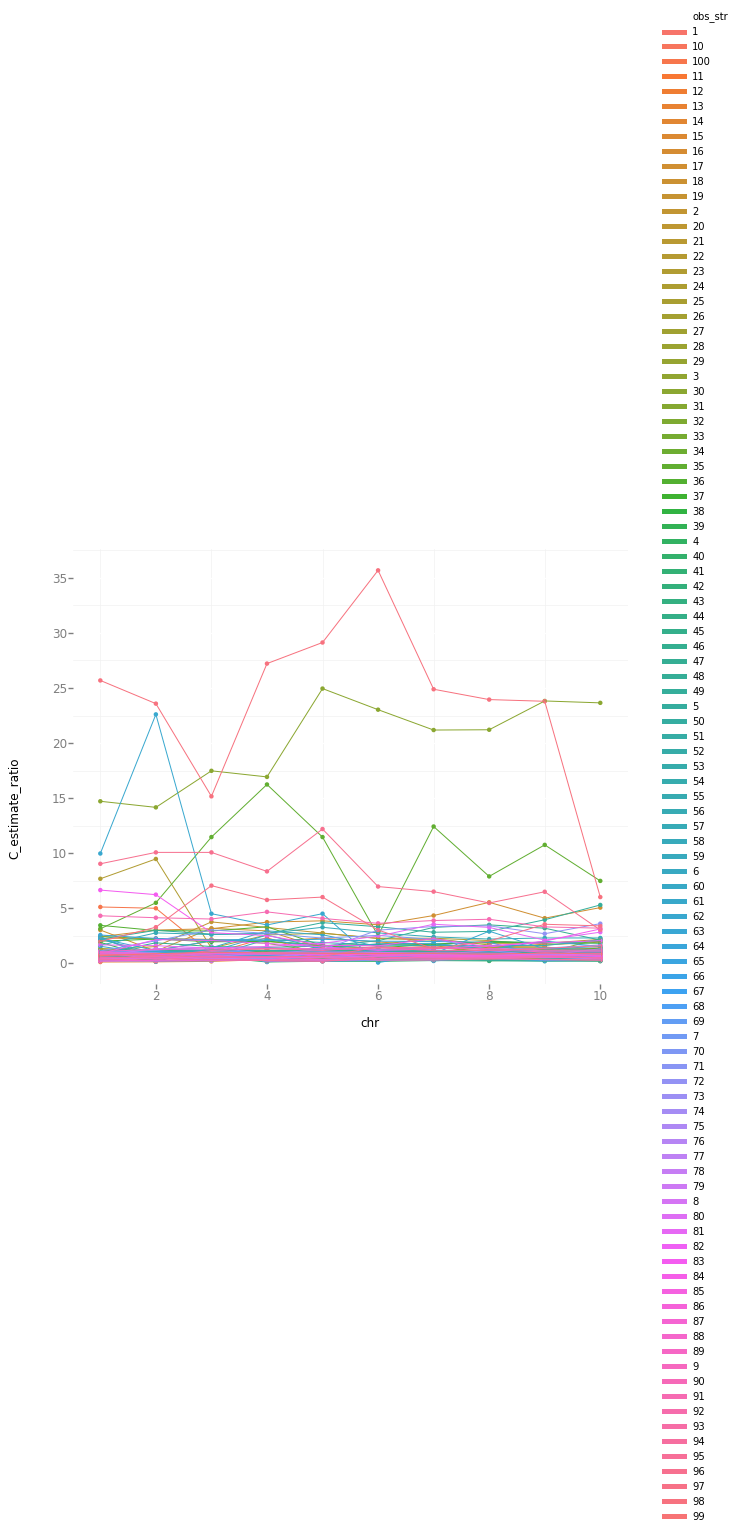

<ggplot: (7575555504)>


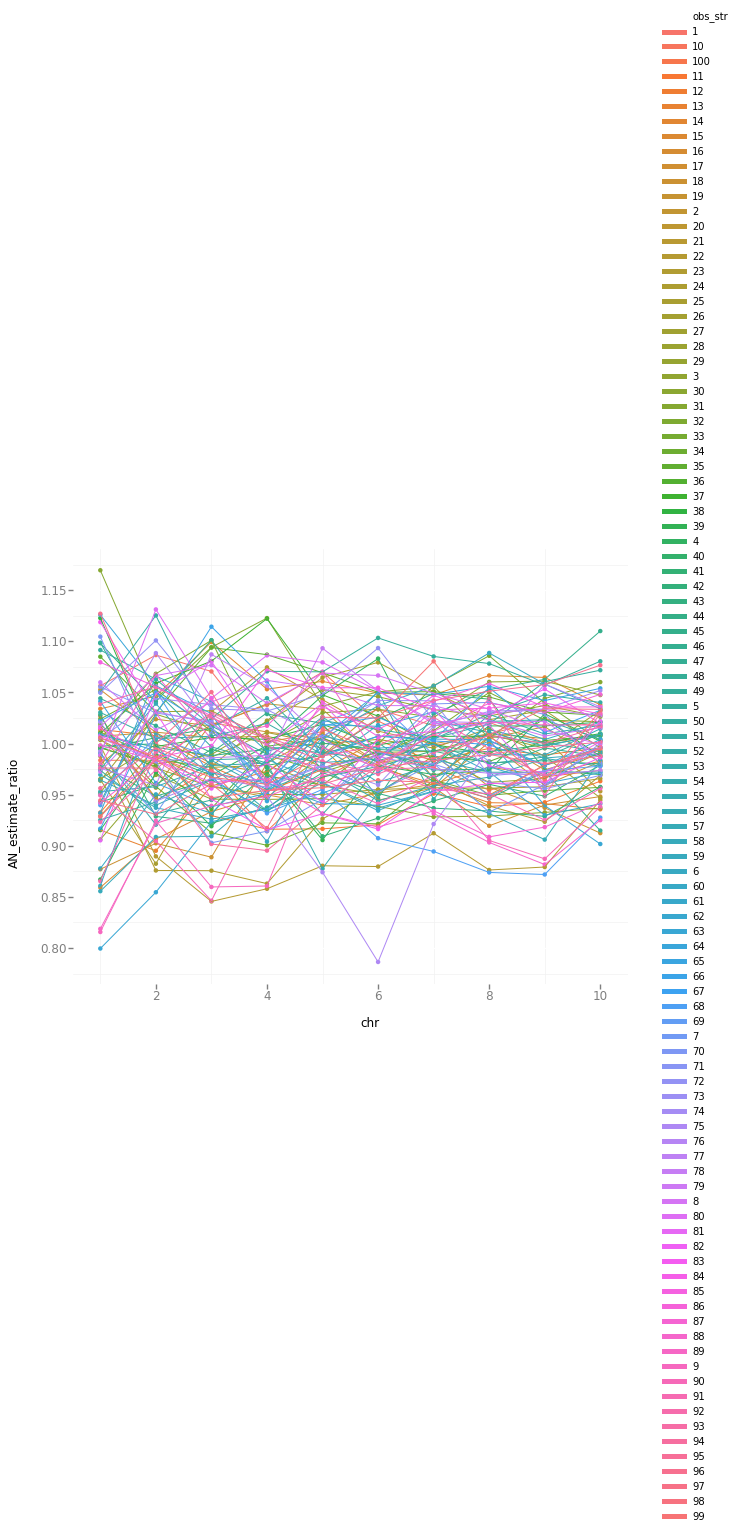

<ggplot: (7612968168)>


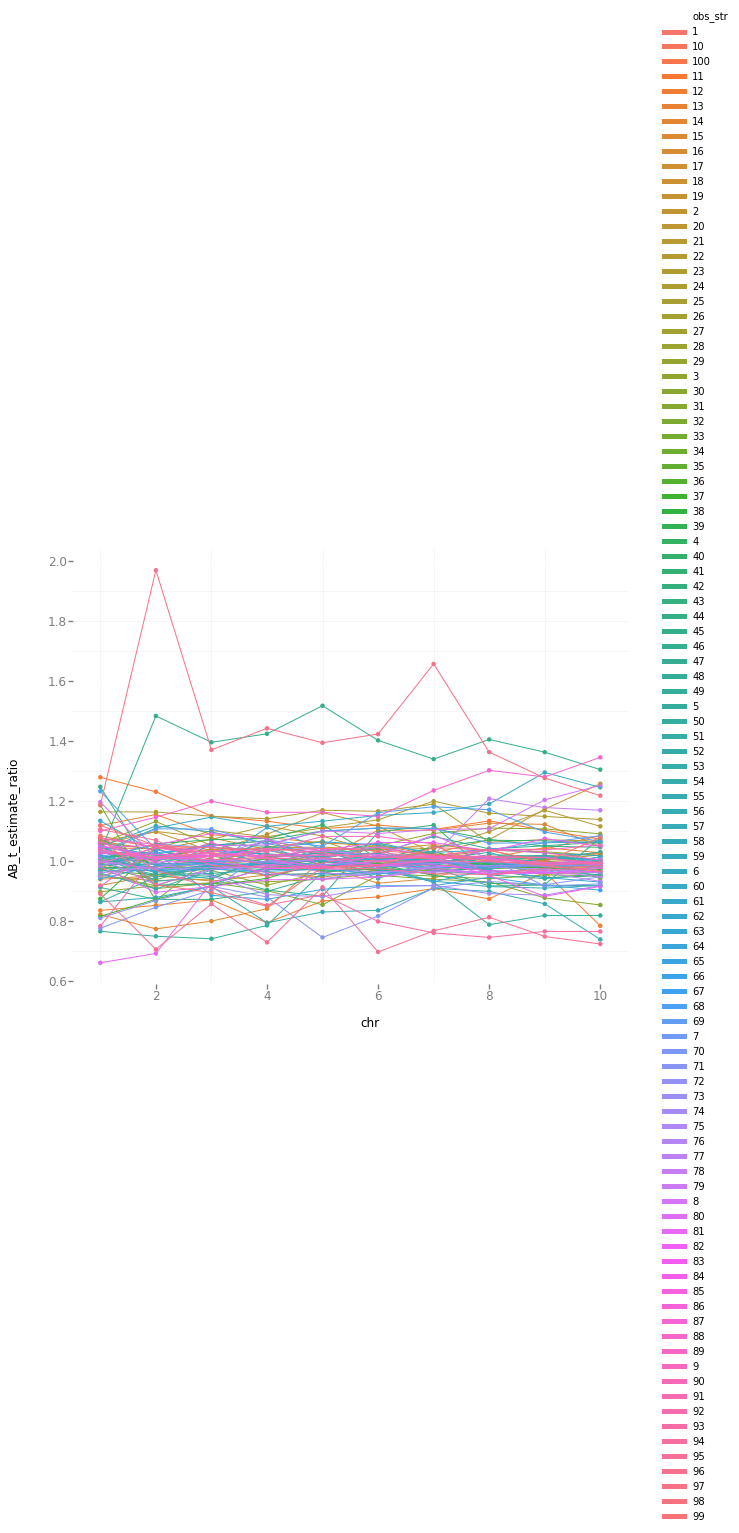

<ggplot: (-9223372029289014114)>


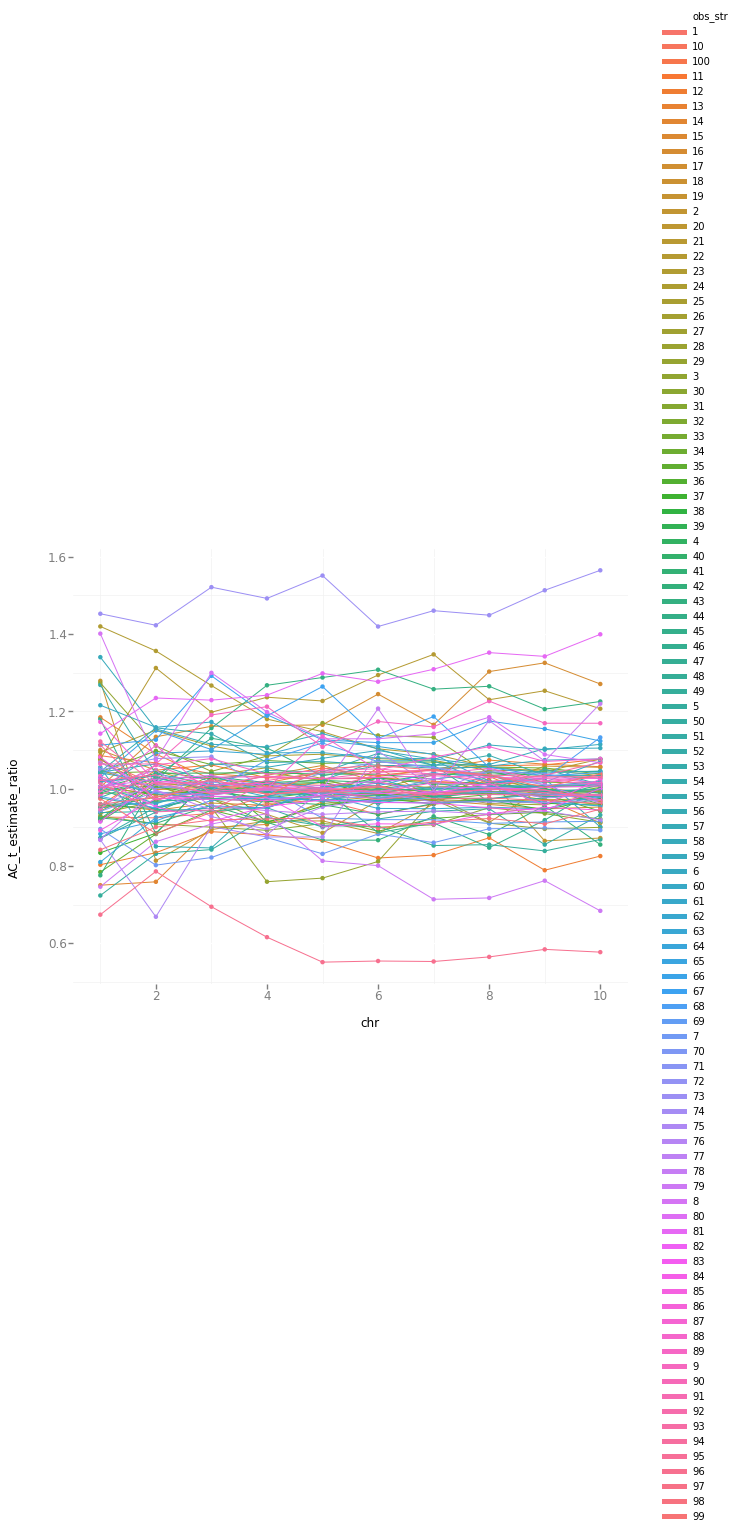

<ggplot: (7611710135)>


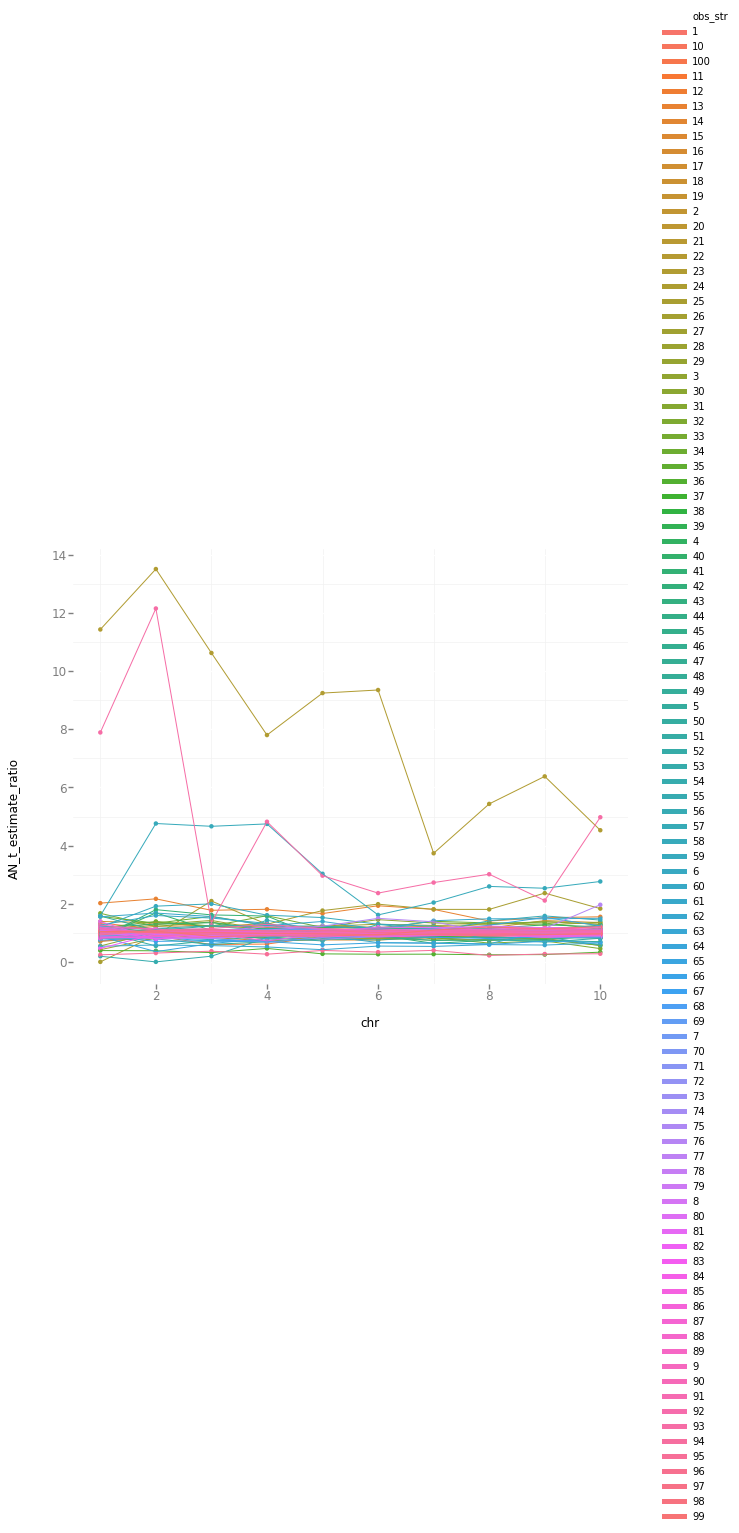

<ggplot: (7551606876)>


In [349]:
for param in parameters:
    estimate_ratio_name = '{}_estimate_ratio'.format(param)
    plot = lineplot(param, combined_PosteriorCharacteristics_observed_df, estimate_ratio_name)
    print(plot)

#### Squared difference of the parameter estimate from the observed value for each chromosome
$(T-E)^2$

Ideally, each successive chromosome should reduce the squared difference from the observed value

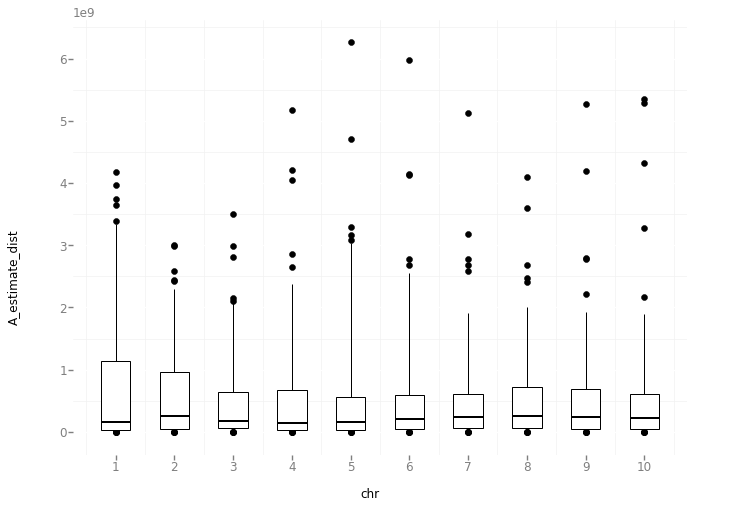

<ggplot: (7567954131)>


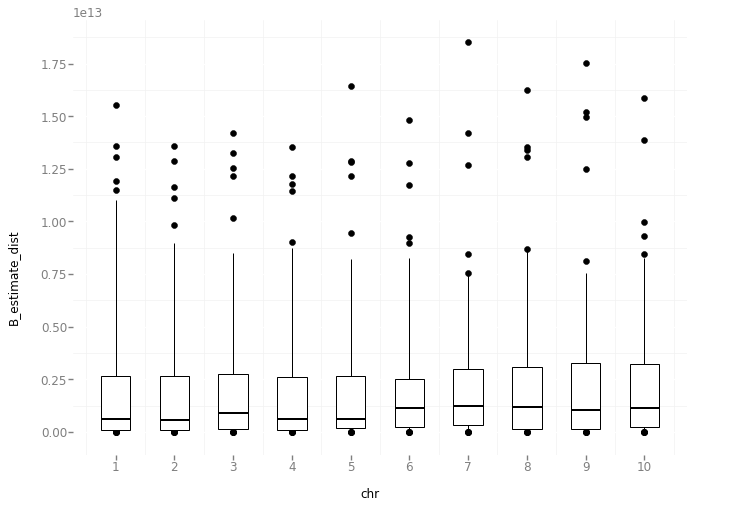

<ggplot: (-9223372029299180996)>


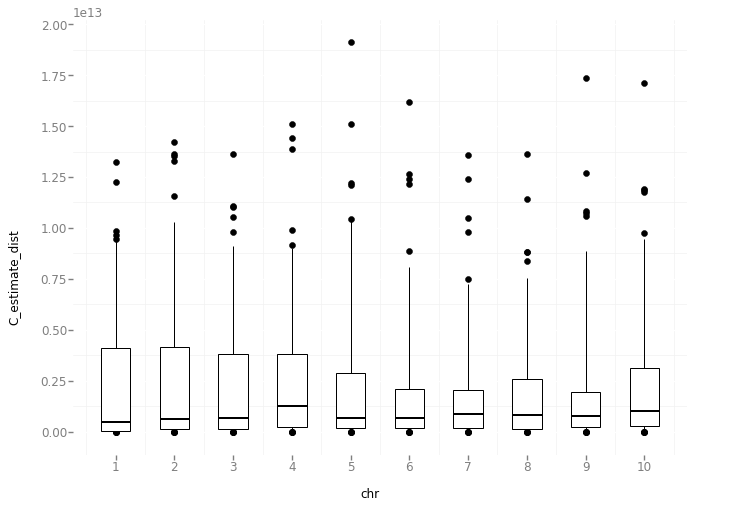

<ggplot: (7564678920)>


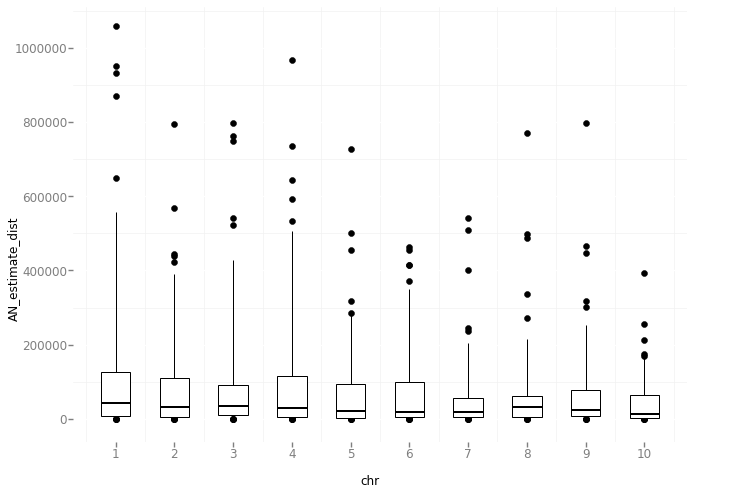

<ggplot: (-9223372029255807800)>


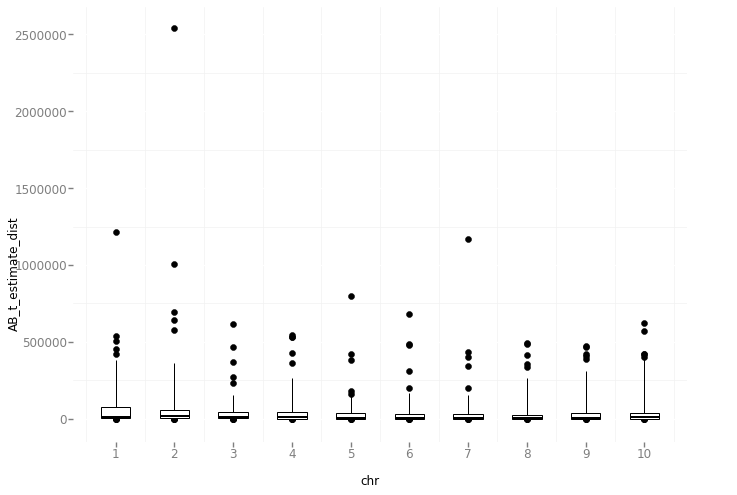

<ggplot: (7607316572)>


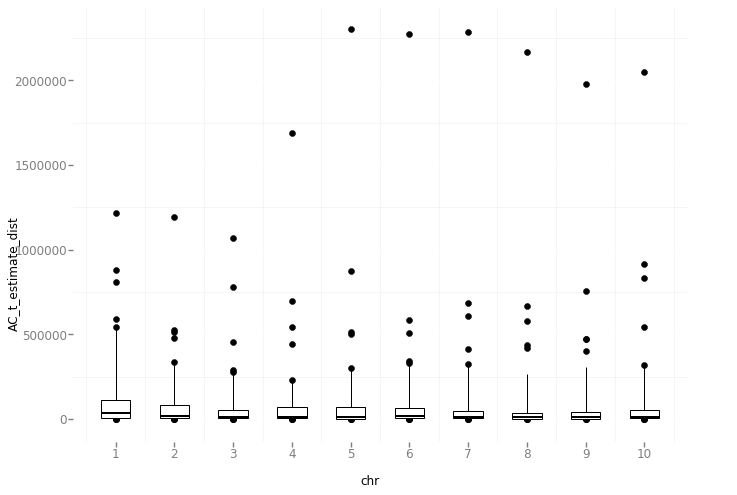

<ggplot: (7607314664)>


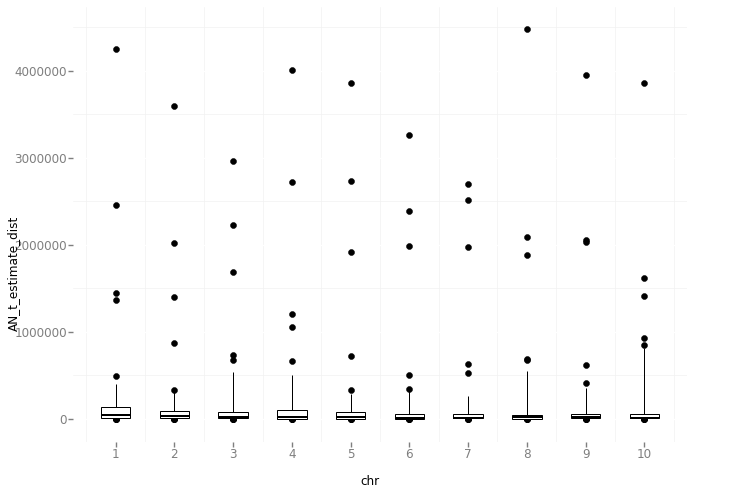

<ggplot: (7570471379)>


In [350]:
for param in parameters:
    estimate_dist_name = '{}_estimate_dist'.format(param)
    plot = boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, estimate_dist_name)
    print(plot)

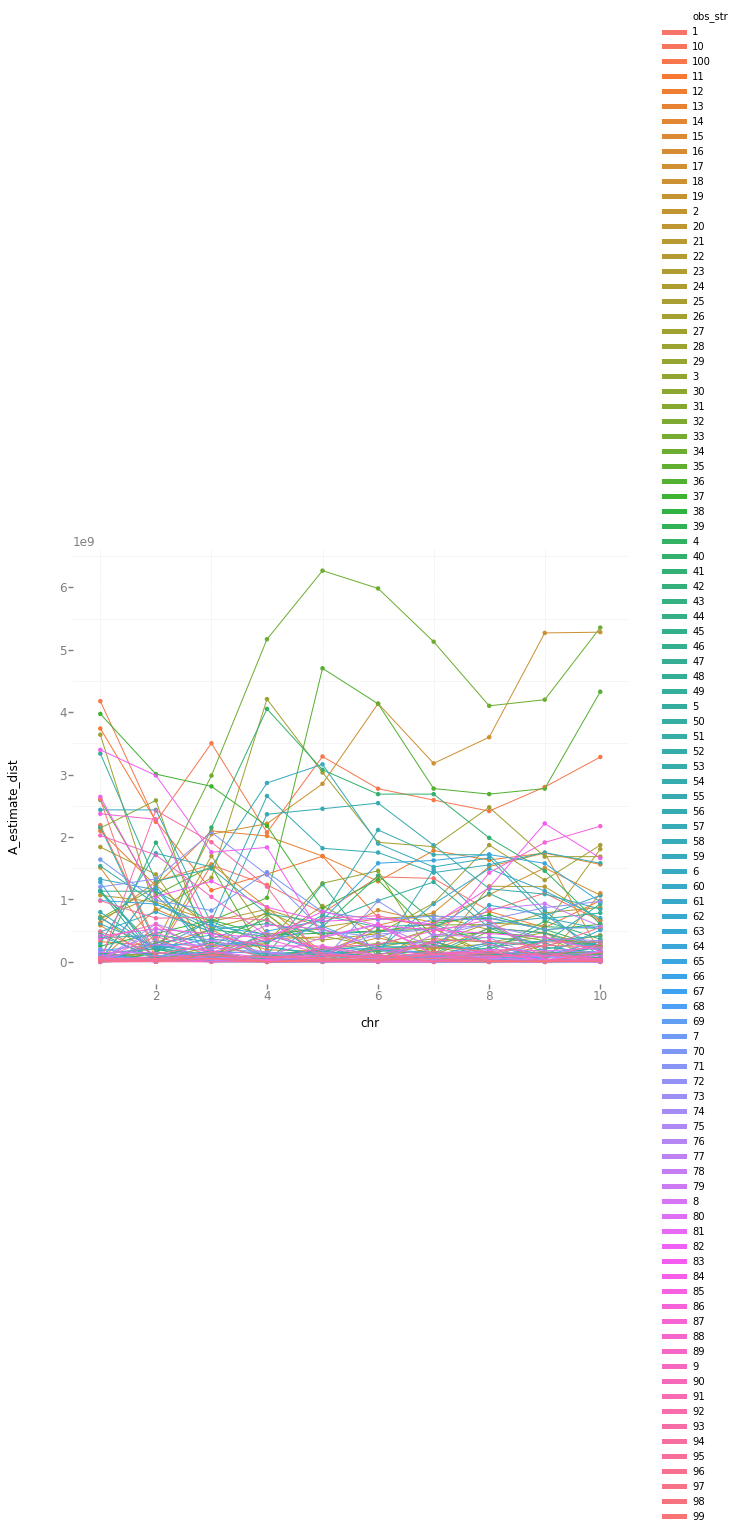

<ggplot: (-9223372029285668380)>


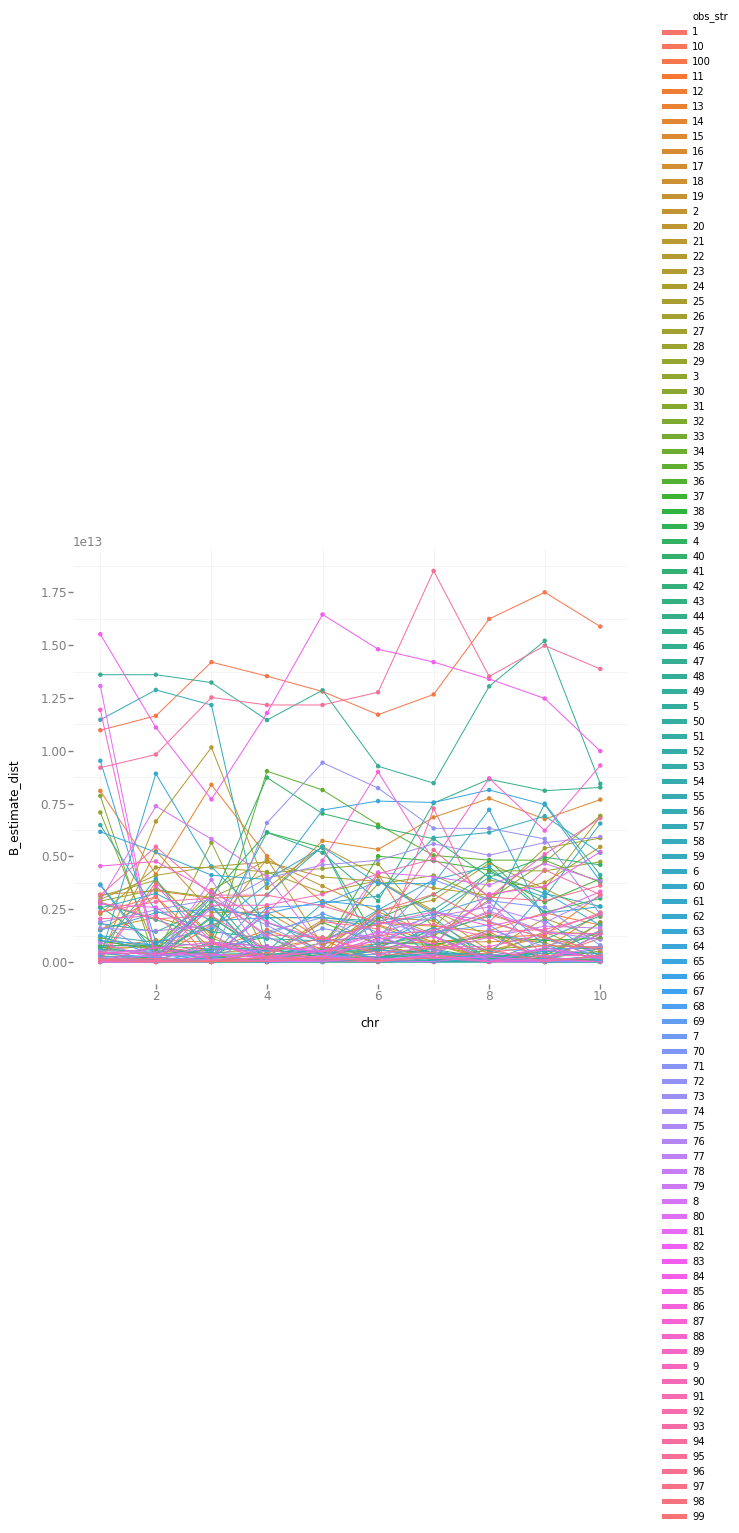

<ggplot: (7561154494)>


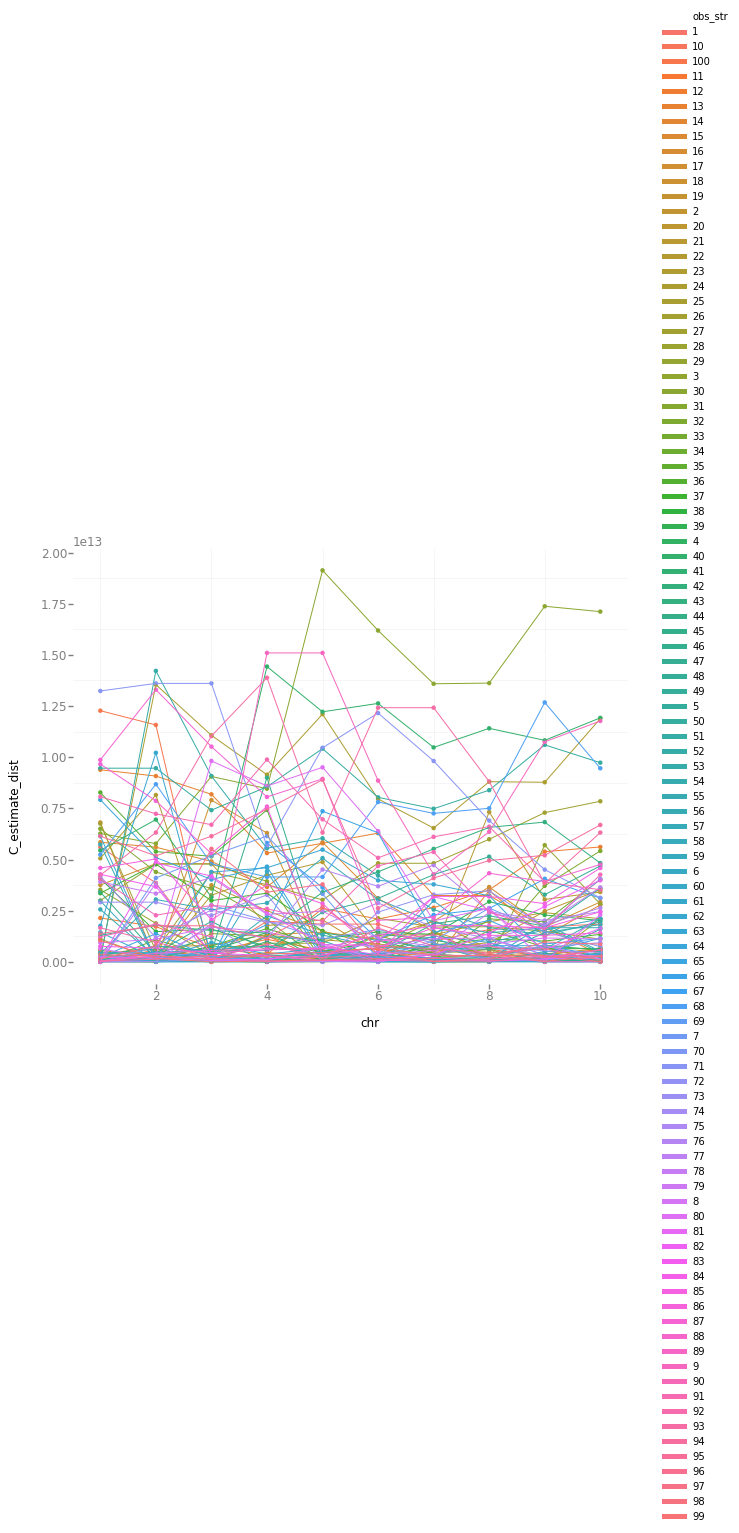

<ggplot: (-9223372029241985504)>


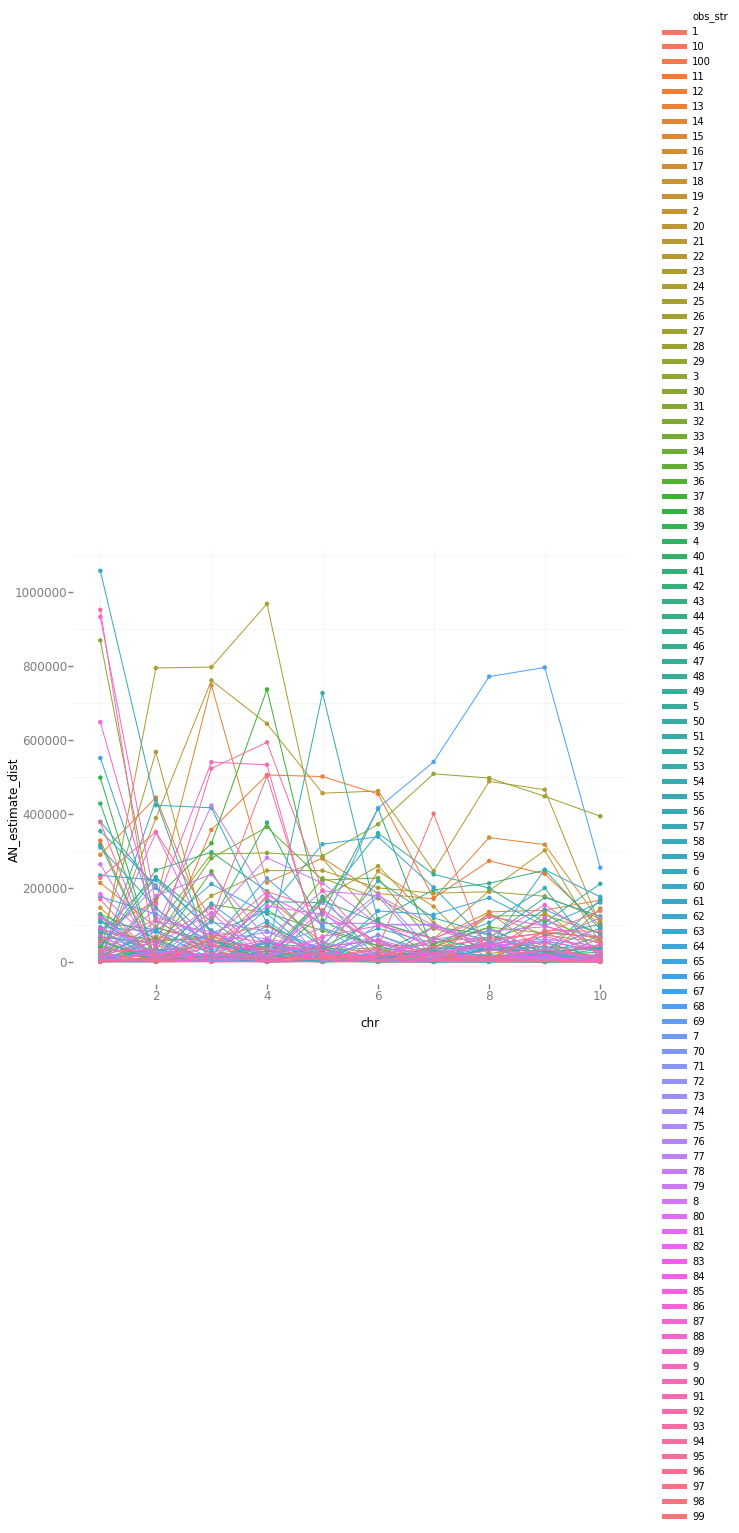

<ggplot: (7613624973)>


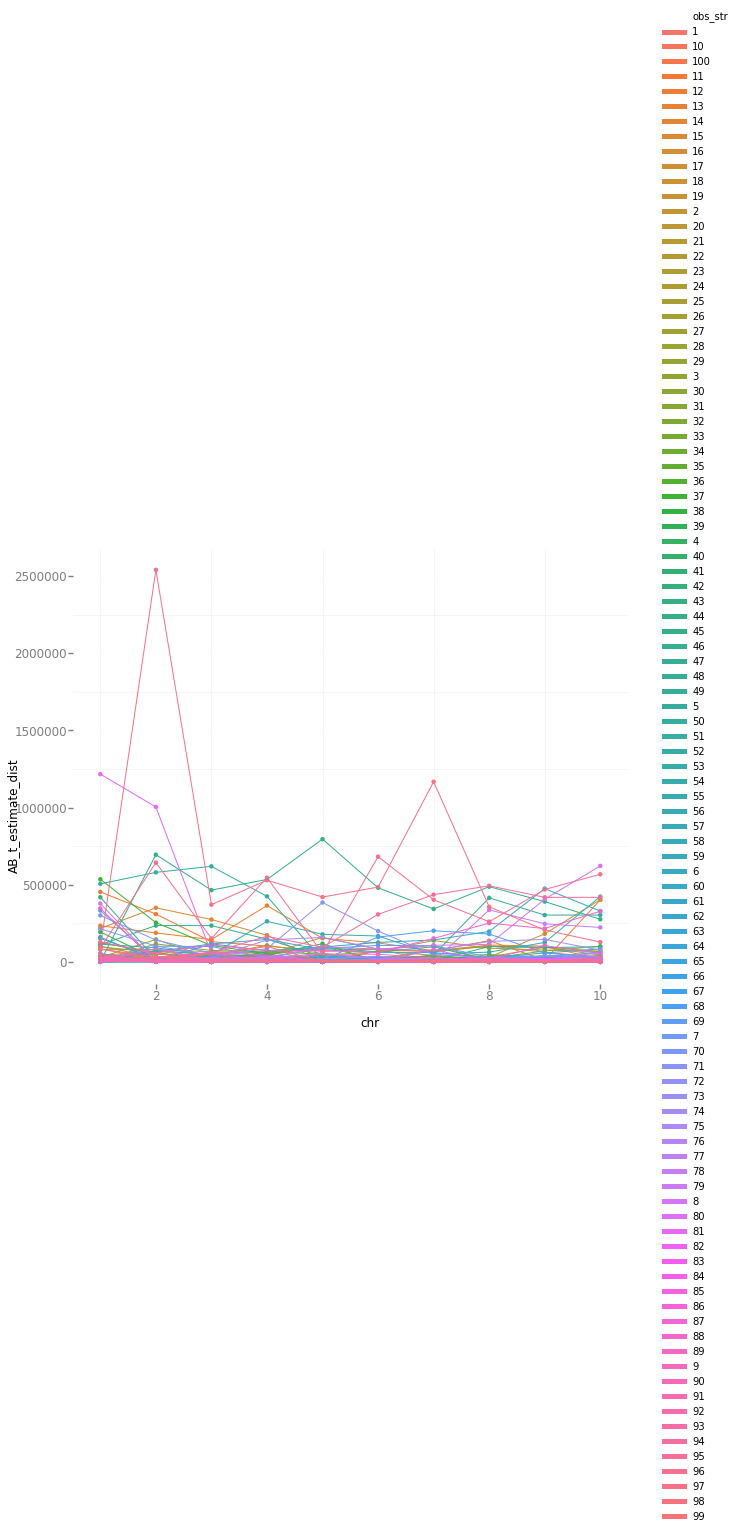

<ggplot: (-9223372029242100017)>


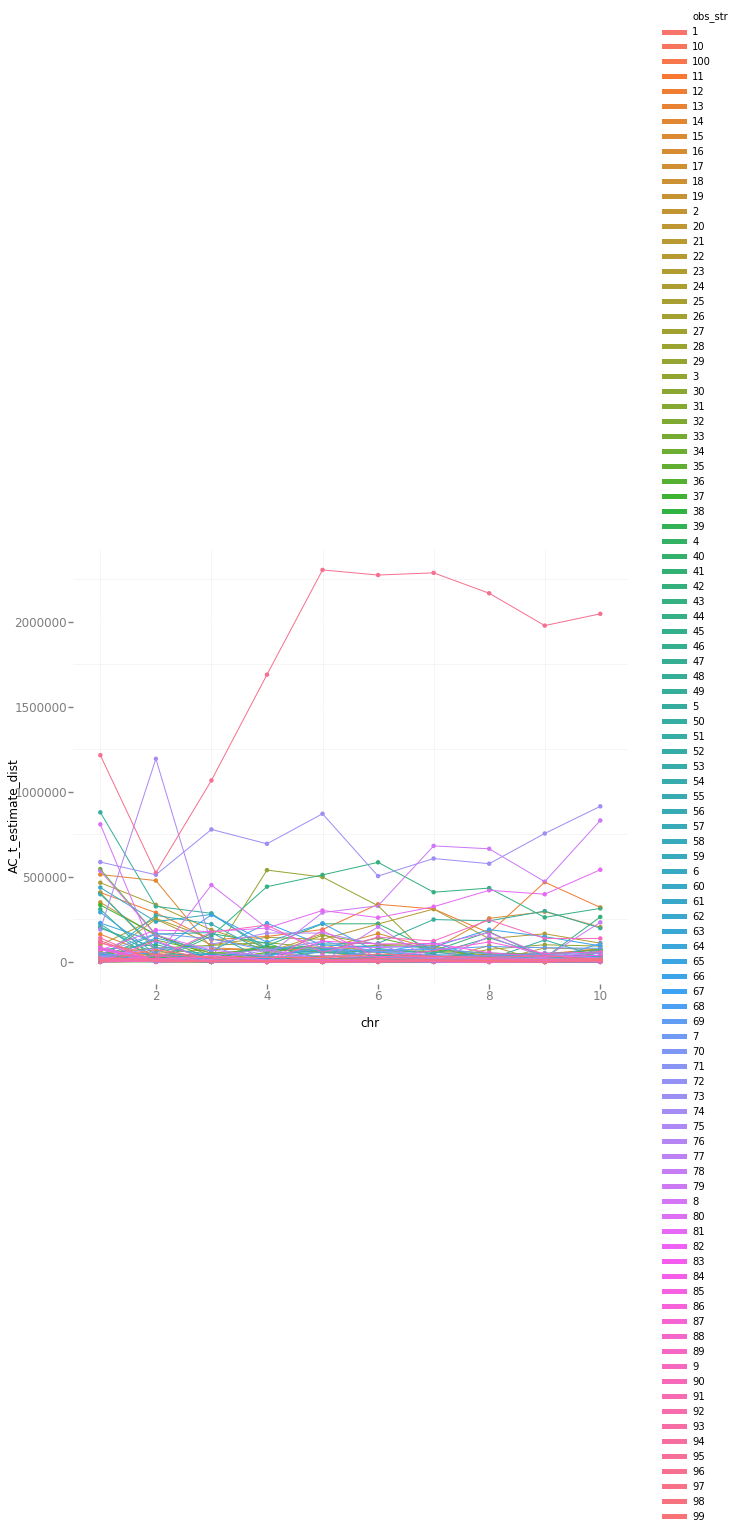

<ggplot: (-9223372029285138358)>


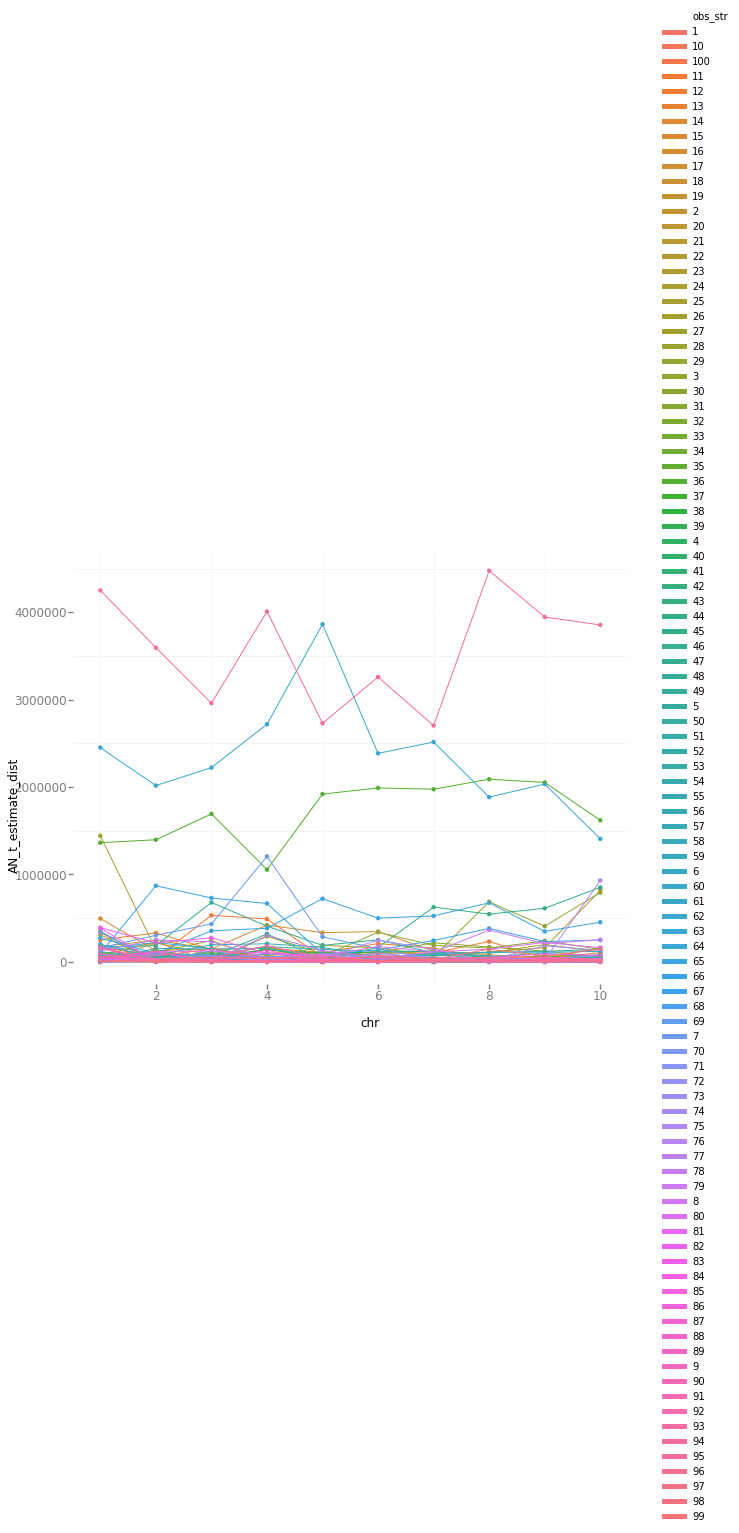

<ggplot: (-9223372029288459516)>


In [351]:
for param in parameters:
    estimate_dist_name = '{}_estimate_dist'.format(param)
    plot = lineplot(param, combined_PosteriorCharacteristics_observed_df, estimate_dist_name)    
    print(plot)

### HPDI_95

#### Proportion of HPDI on chromosomes >1 closer to true value than chr1
If the prior updating scheme improved the 95 HPDI of the parameter estimates, we would expect the proportion of the 95 HPDI closer to the true estimates than the distance of chromosomes 1 to increase as chromosomes increase.

All the parameters have improved 95 HPDI relative to chromosome 1. However, in general the 95 HPDI for most of the parameters do not substantially improve after the 2 or 3rd chromosome.

In [67]:
df_list = []
for chrom in range(2, 11):
    for param in parameters:
        HPDI_dist_name = '{}_HPDI_dist'.format(param)
        proportion_smaller_dict = proportion_smaller_chr1(combined_PosteriorCharacteristics_observed_df, HPDI_dist_name, str(chrom), param)
        df_chrom = pd.DataFrame(proportion_smaller_dict, index = [0])
        df_list.append(df_chrom)
proportion_df = pd.concat(df_list)

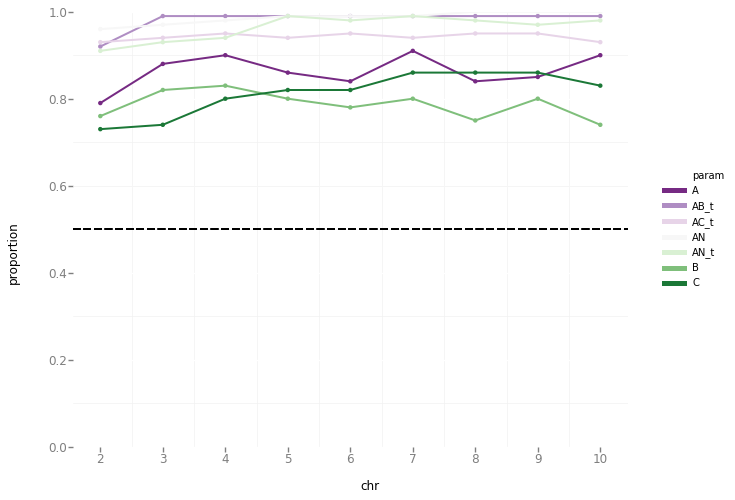

<ggplot: (7550308728)>


In [69]:
plot = lineplot2(proportion_df)
print(plot)

#### Ratio of parameter HPDI to true value
$\dfrac{HPDI}{T}$

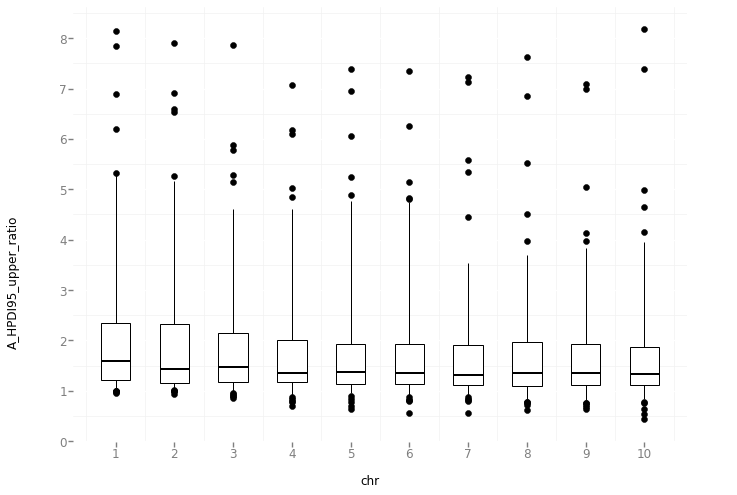

<ggplot: (-9223372029296717550)>


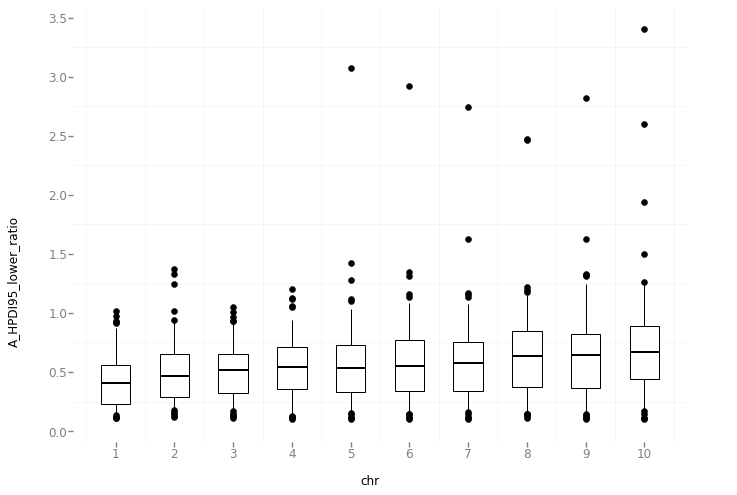

<ggplot: (7556161158)>


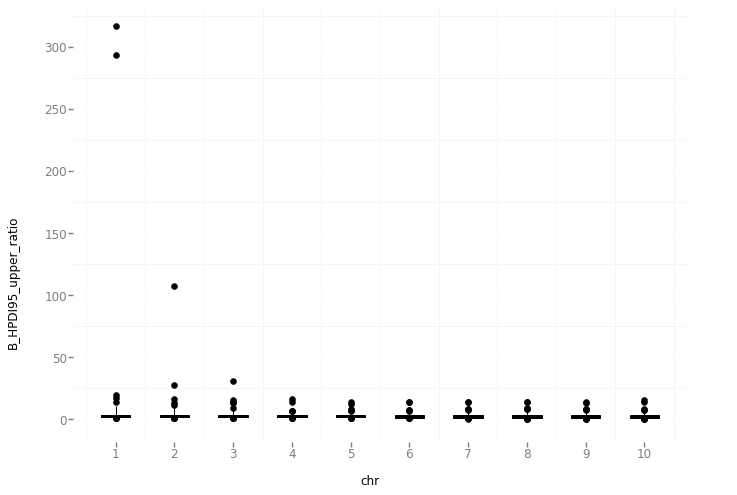

<ggplot: (-9223372029288035917)>


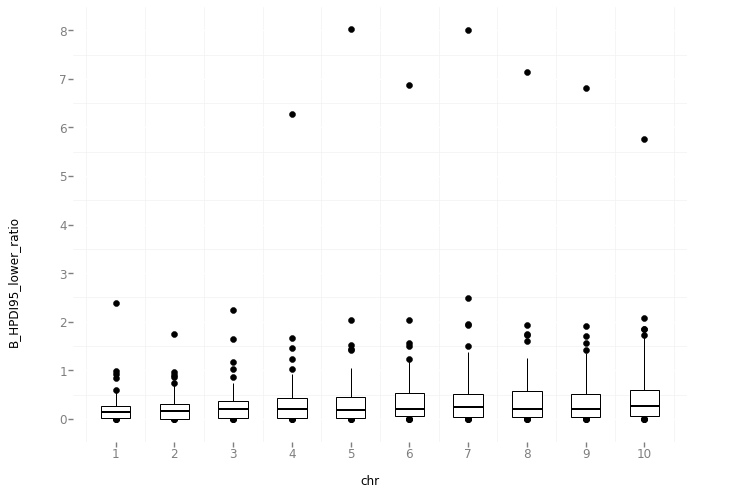

<ggplot: (7569175928)>


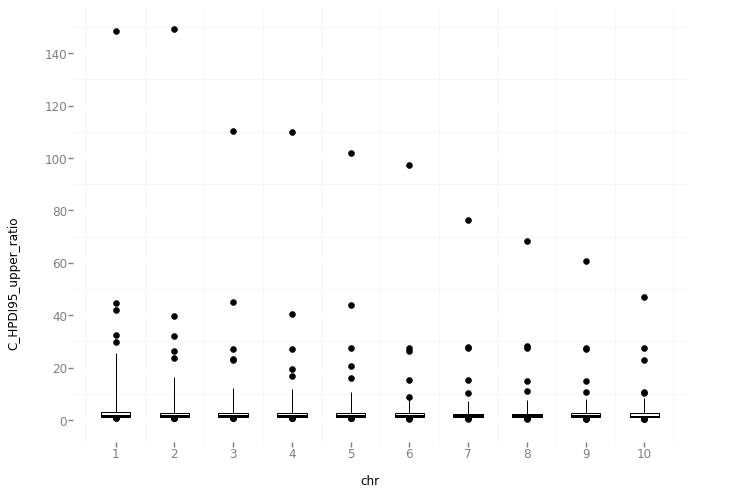

<ggplot: (7561705662)>


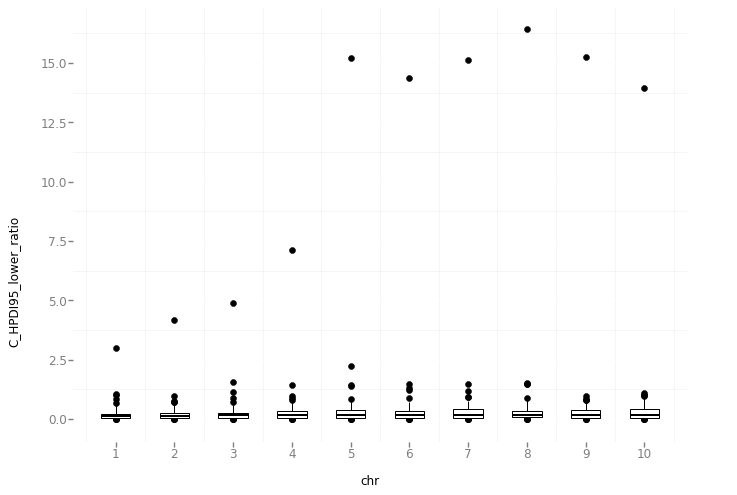

<ggplot: (7575571478)>


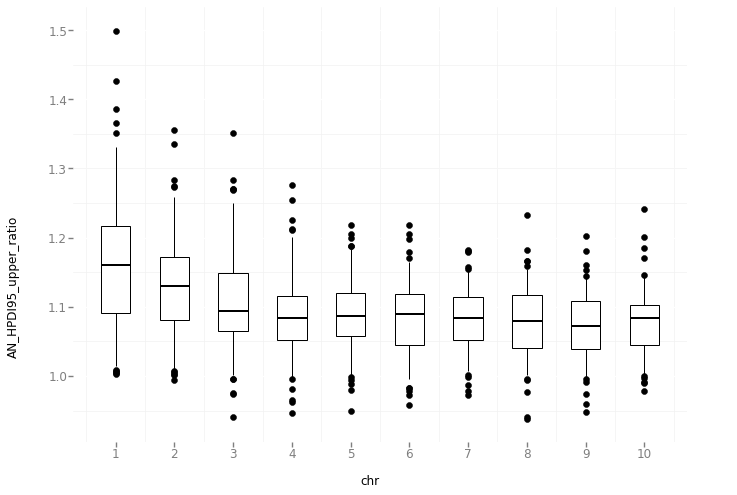

<ggplot: (-9223372029279102569)>


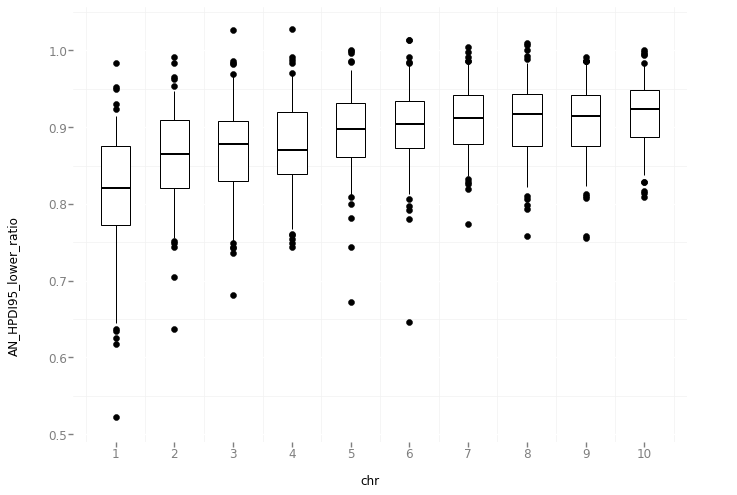

<ggplot: (7561164380)>


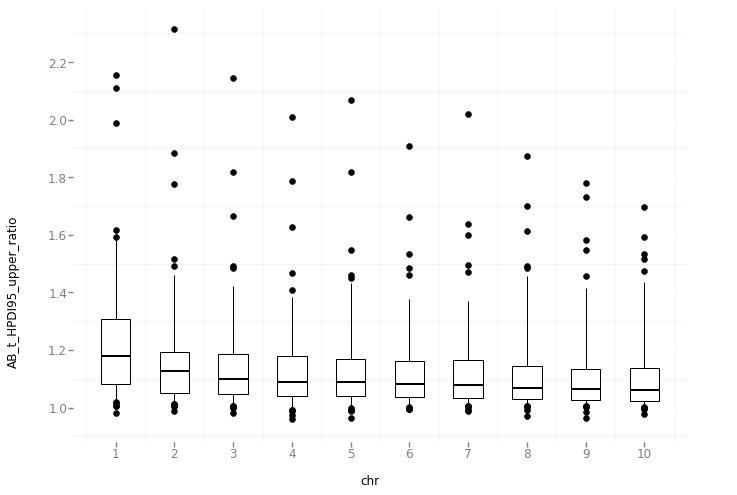

<ggplot: (-9223372029293611467)>


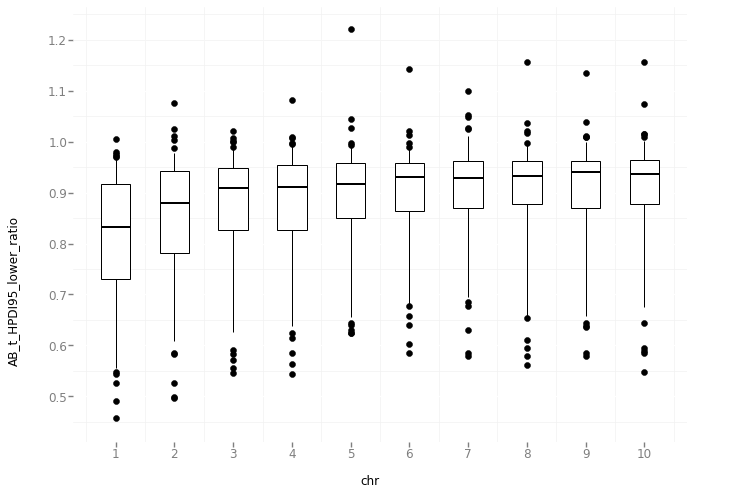

<ggplot: (7569050551)>


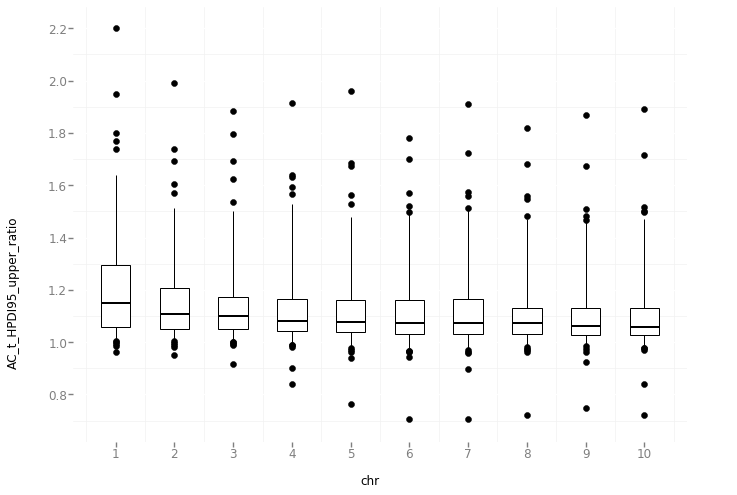

<ggplot: (7555587318)>


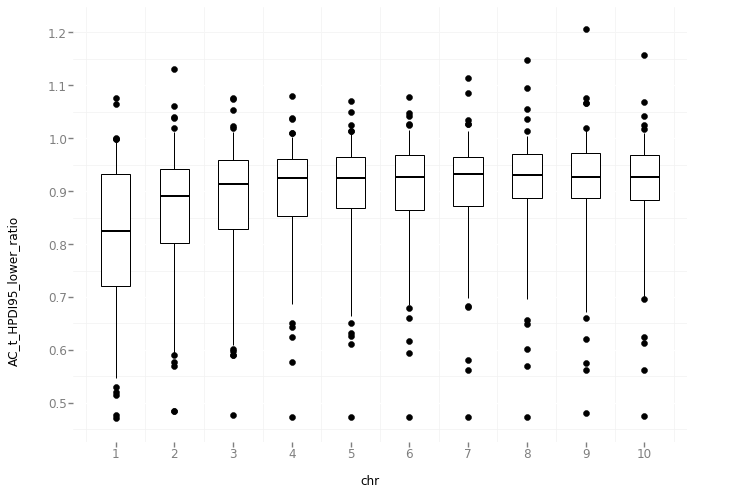

<ggplot: (-9223372029287029781)>


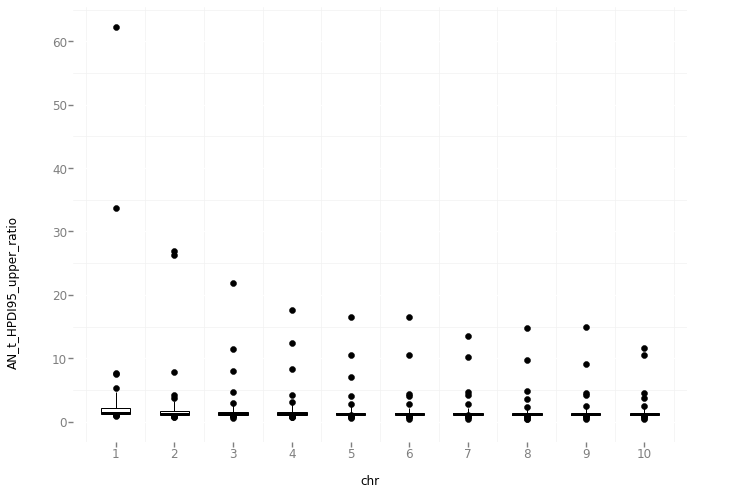

<ggplot: (-9223372029281569315)>


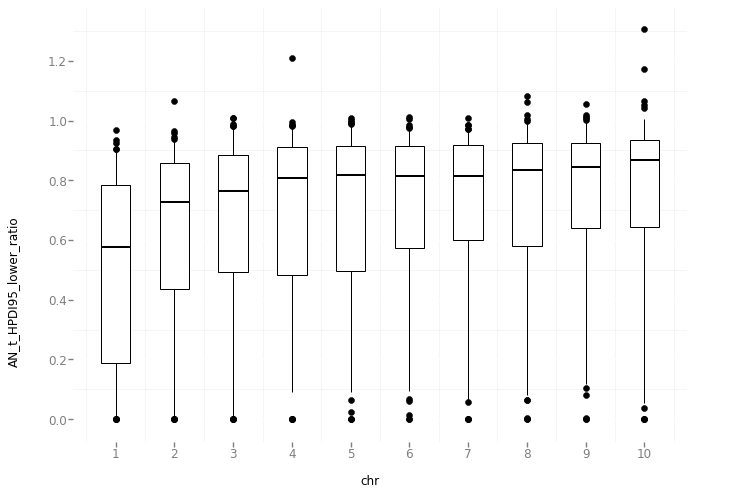

<ggplot: (-9223372029296202815)>


In [353]:
for param in parameters:
    estimate_HPDI_upper_name = '{}_HPDI95_upper_ratio'.format(param)
    plot = boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, estimate_HPDI_upper_name)
    print(plot)
    estimate_HPDI_lower_name = '{}_HPDI95_lower_ratio'.format(param)
    plot = boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, estimate_HPDI_lower_name)
    print(plot)

#### Distance between upper and lower ratios of parameter HPDI to true values
$\dfrac{HPDI_{U}}{T} - \dfrac{HPDI_{L}}{T}$

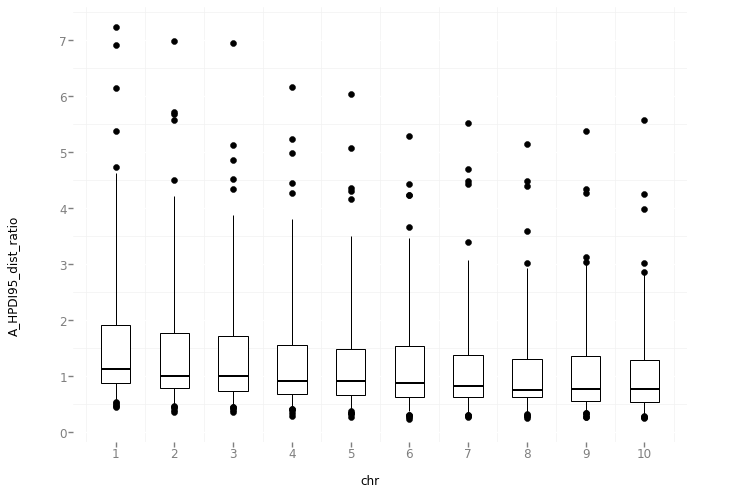

<ggplot: (-9223372029287065568)>


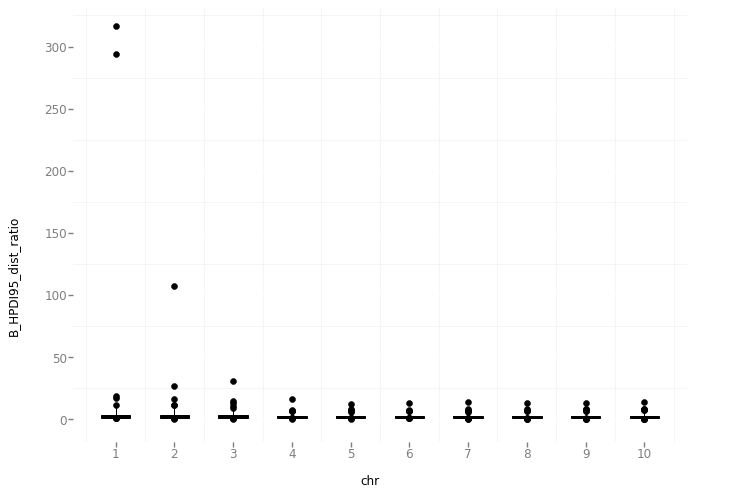

<ggplot: (7611874971)>


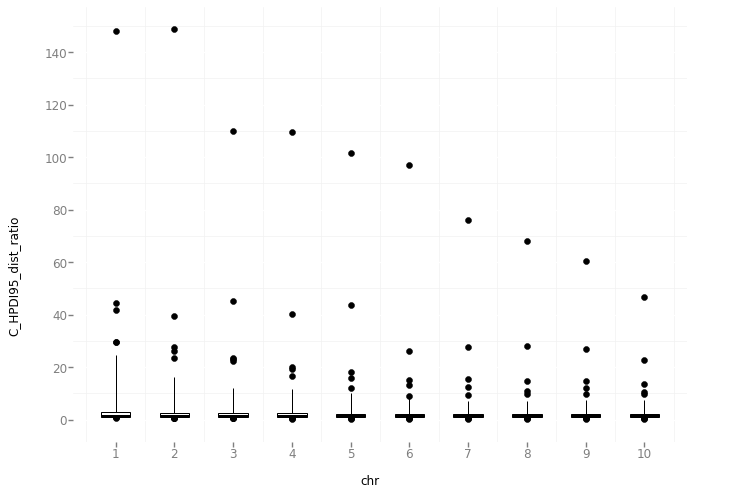

<ggplot: (7575649740)>


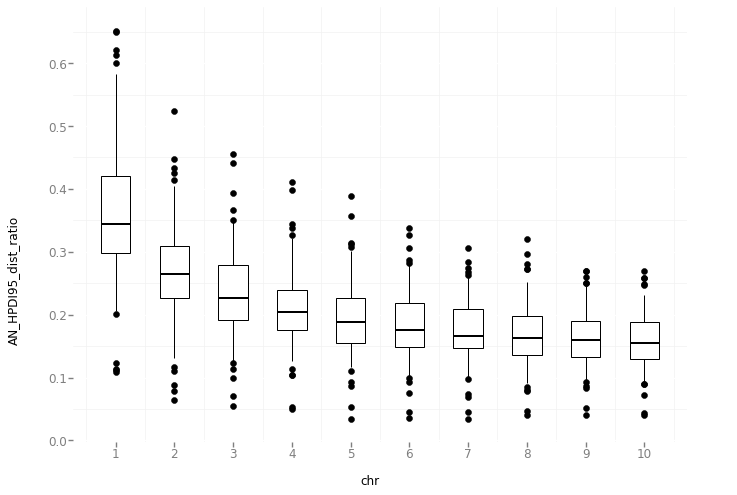

<ggplot: (7551476912)>


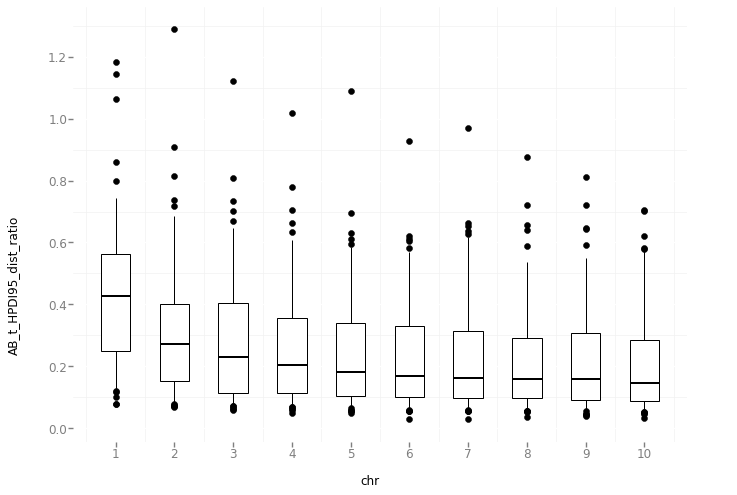

<ggplot: (-9223372029293964014)>


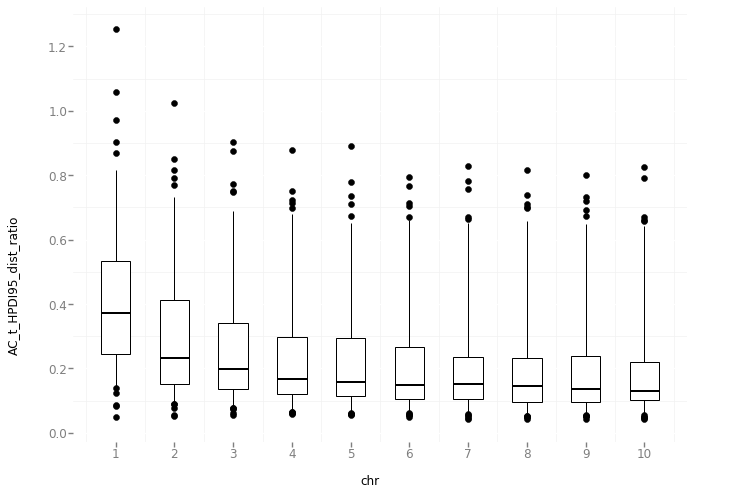

<ggplot: (7577262582)>


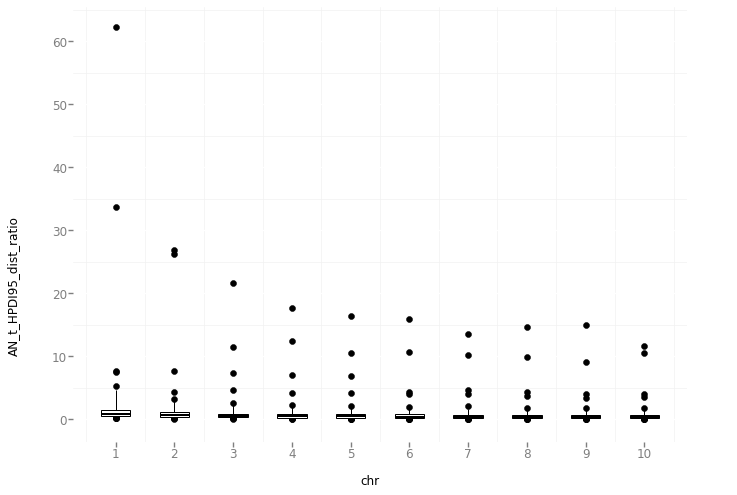

<ggplot: (7560816269)>


In [354]:
for param in parameters:
    dist_ratio_name = '{}_HPDI95_dist_ratio'.format(param)
    plot = boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, dist_ratio_name)
    print(plot)

#### Squared difference of the HPDI_95 from the observed value for each chromosome
$(T-HL)^2 + (T-HH)^2$, if $T > HH$ or $T < HL$, then $((T-HL)^2 + (T-HH)^2)(-1)$

Ideally, each successive chromosome should reduce the squared difference from the observed value, down to 0. 

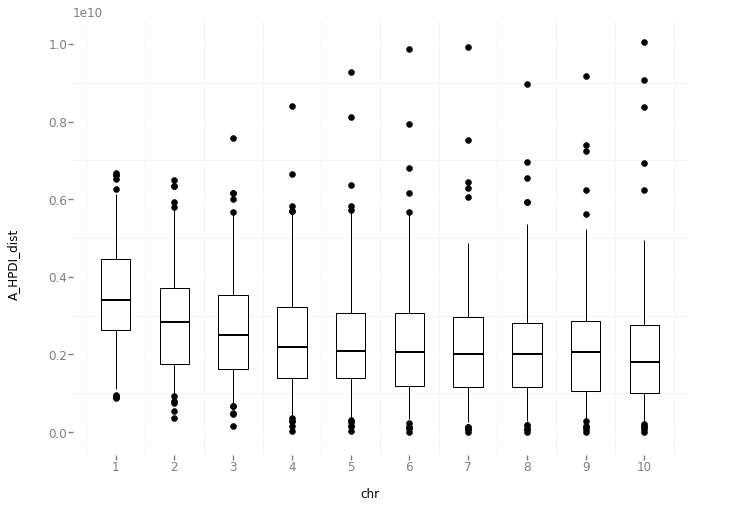

<ggplot: (7551480142)>


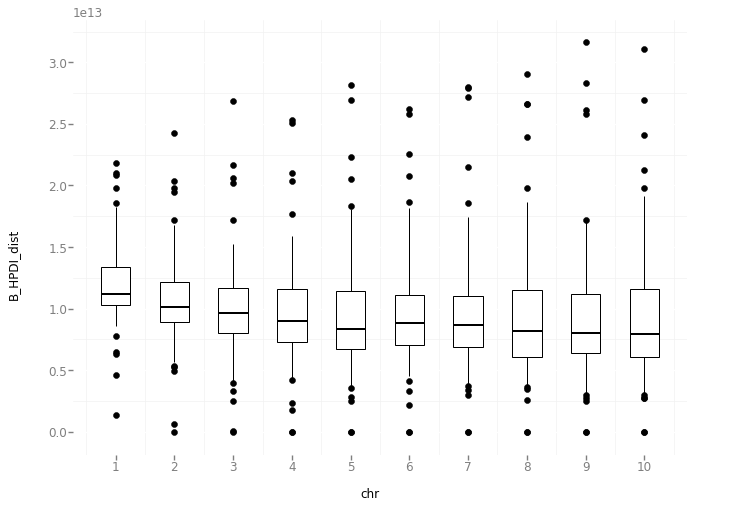

<ggplot: (7558603875)>


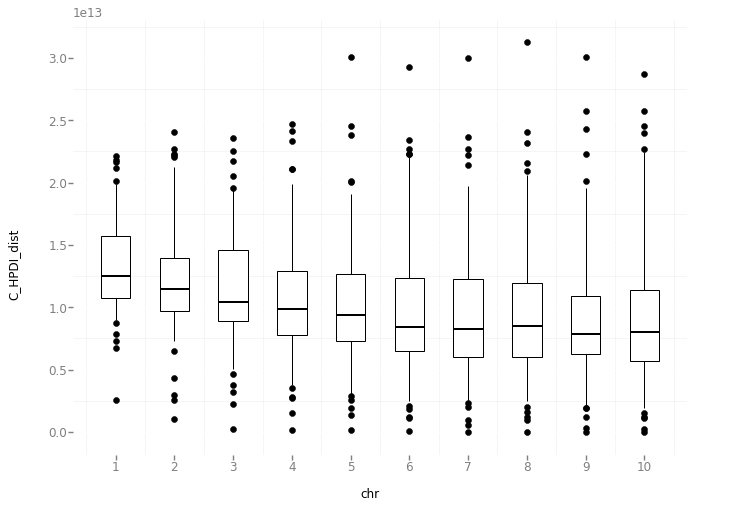

<ggplot: (7564115681)>


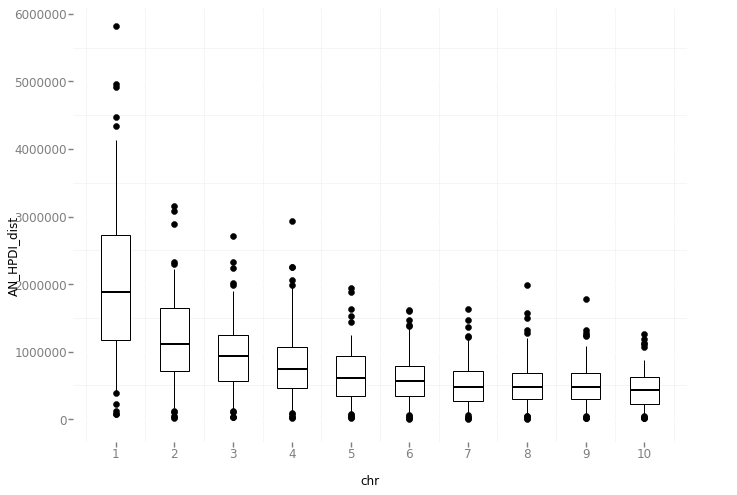

<ggplot: (7565625194)>


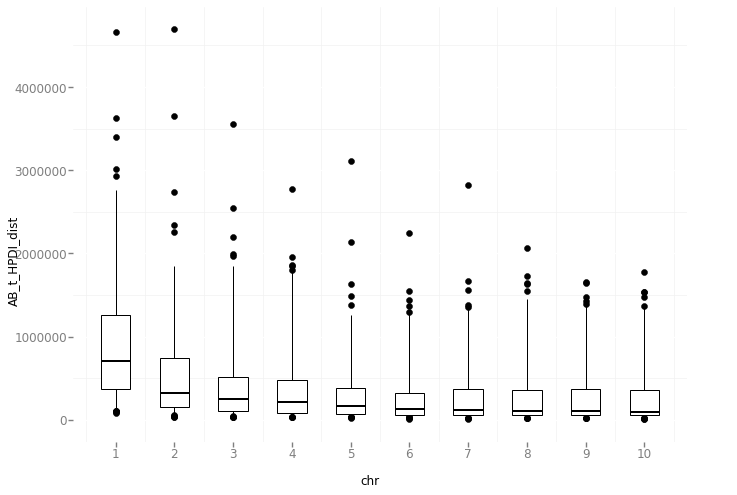

<ggplot: (7554253821)>


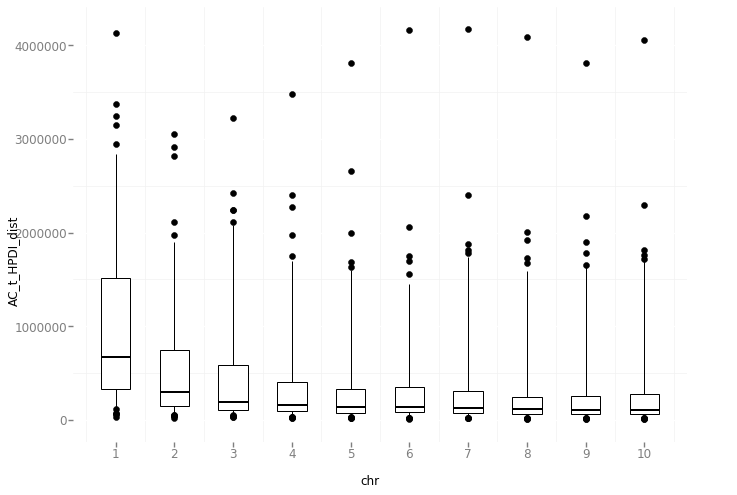

<ggplot: (7556135737)>


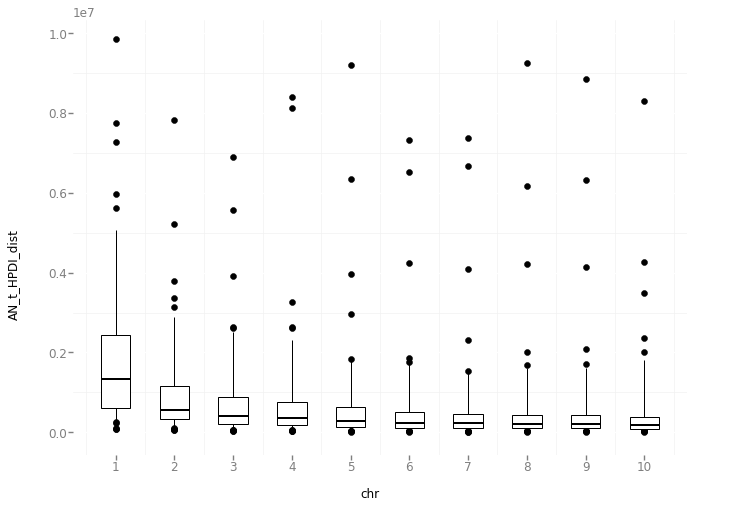

<ggplot: (-9223372029293642948)>


In [355]:
for param in parameters:
    HPDI_dist_name = '{}_HPDI_dist'.format(param)
    plot = boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, HPDI_dist_name)
    print(plot)

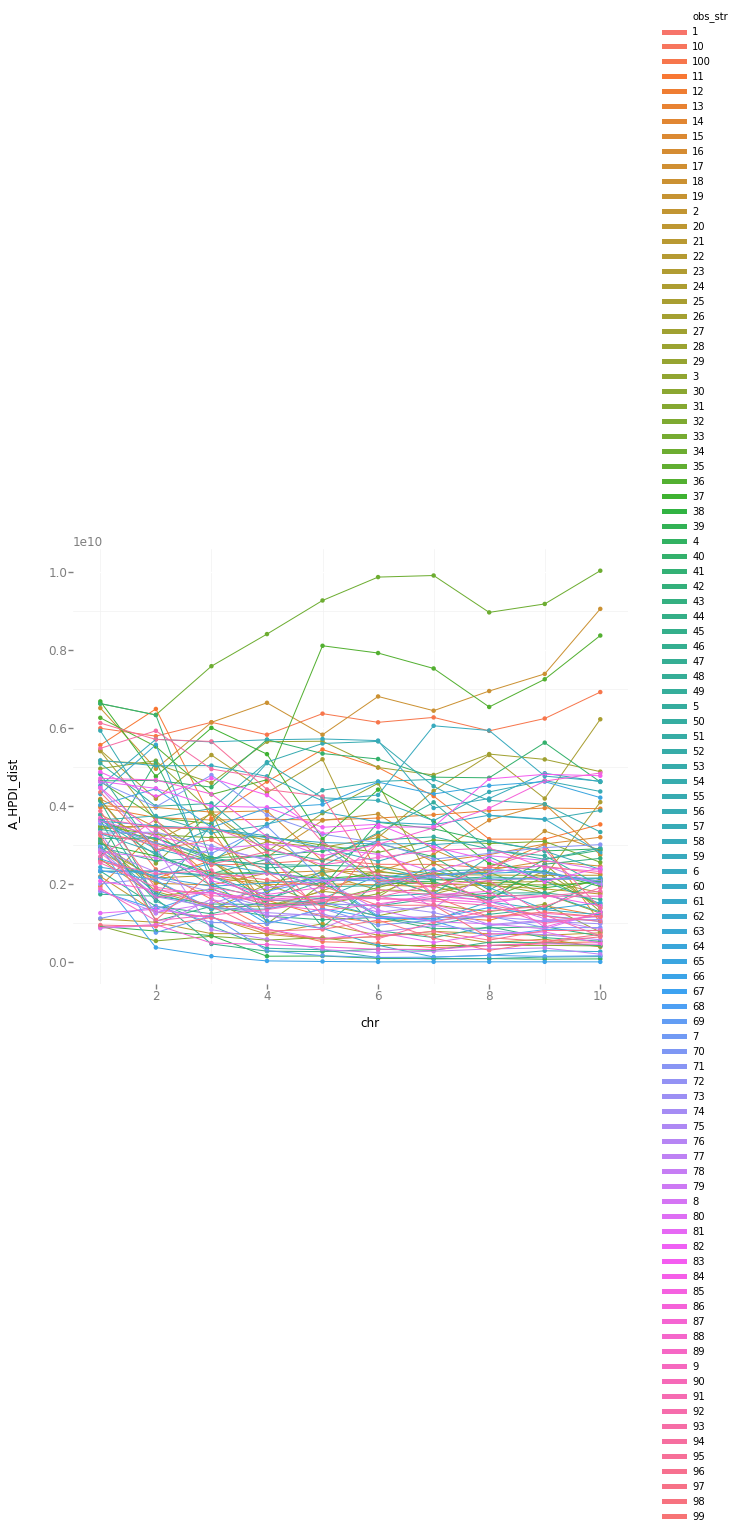

<ggplot: (-9223372029299244428)>


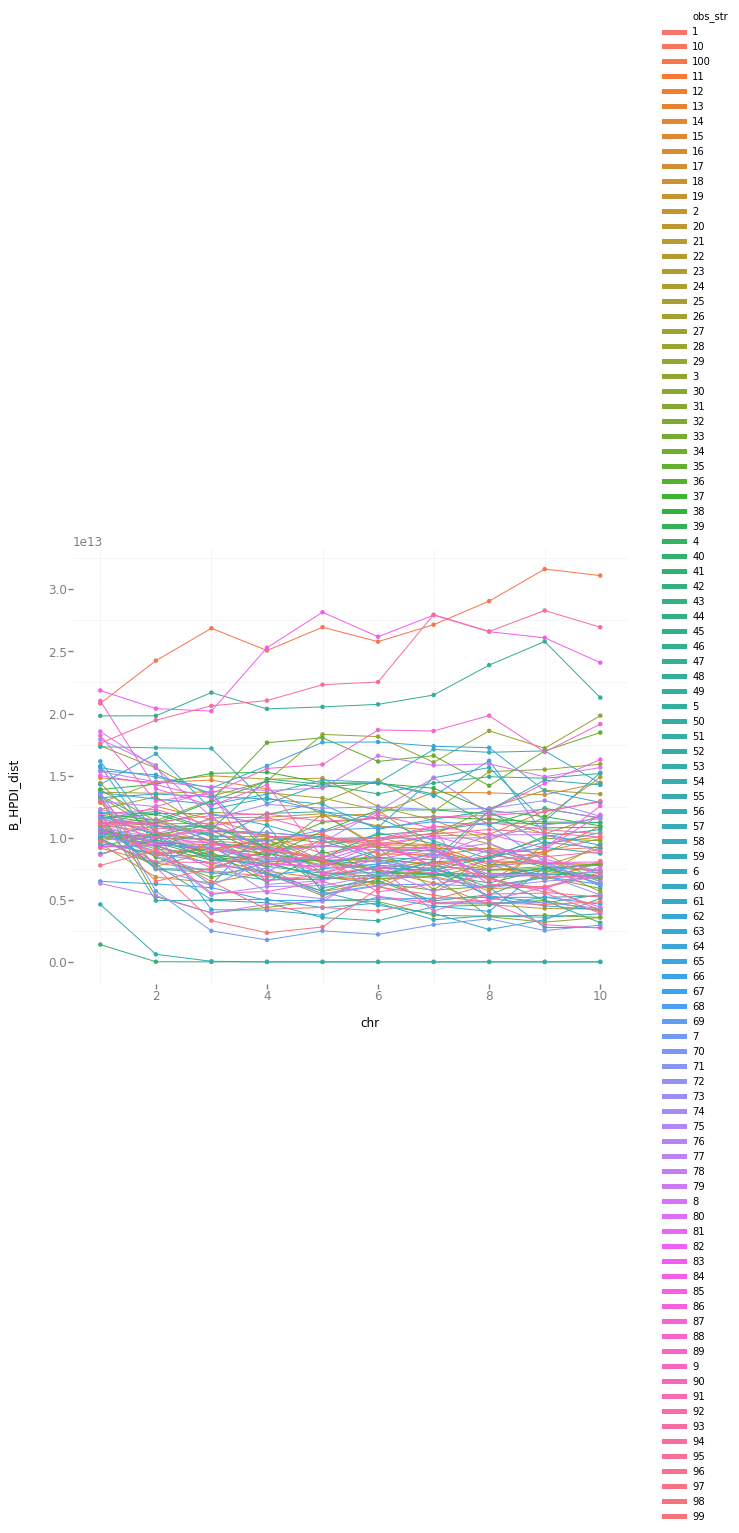

<ggplot: (7607310733)>


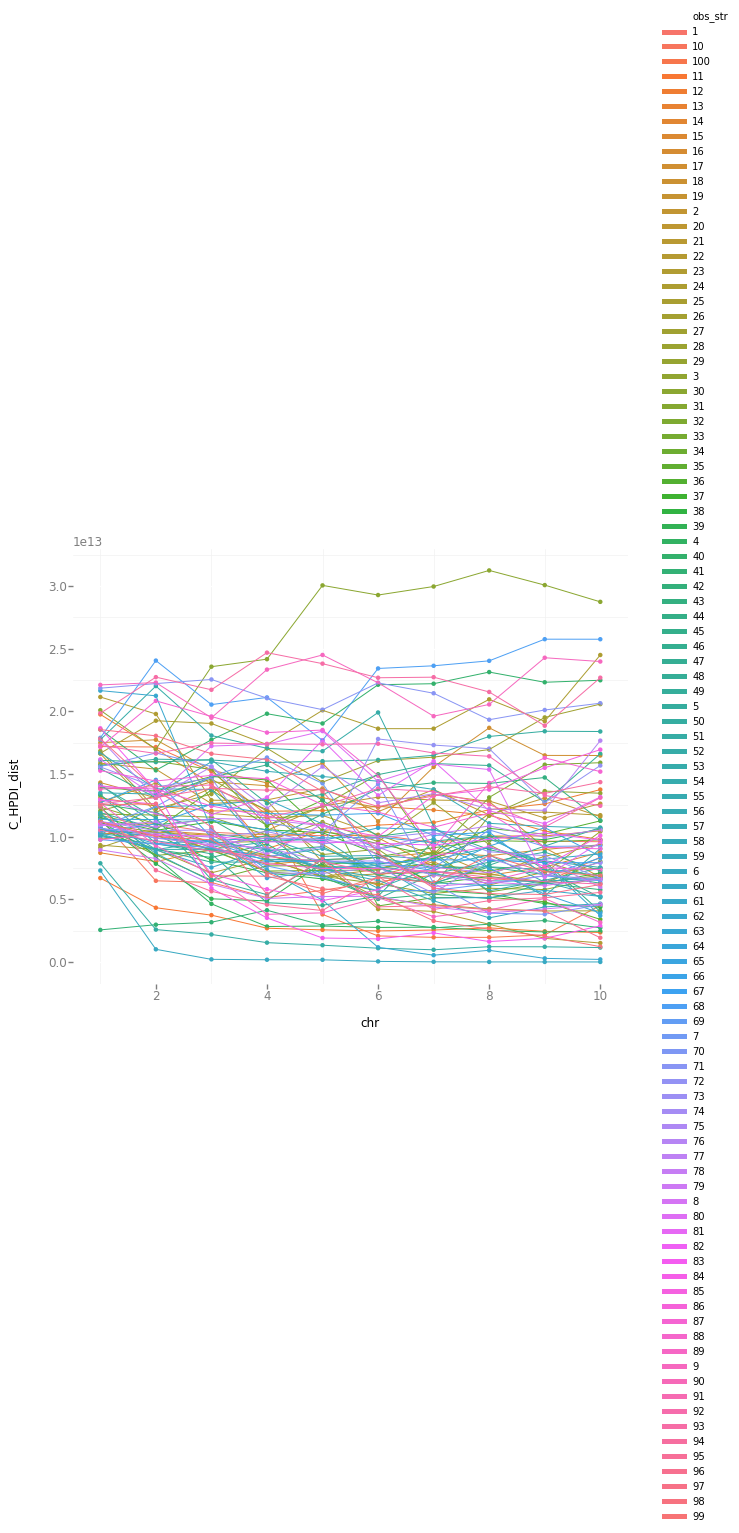

<ggplot: (-9223372029291649171)>


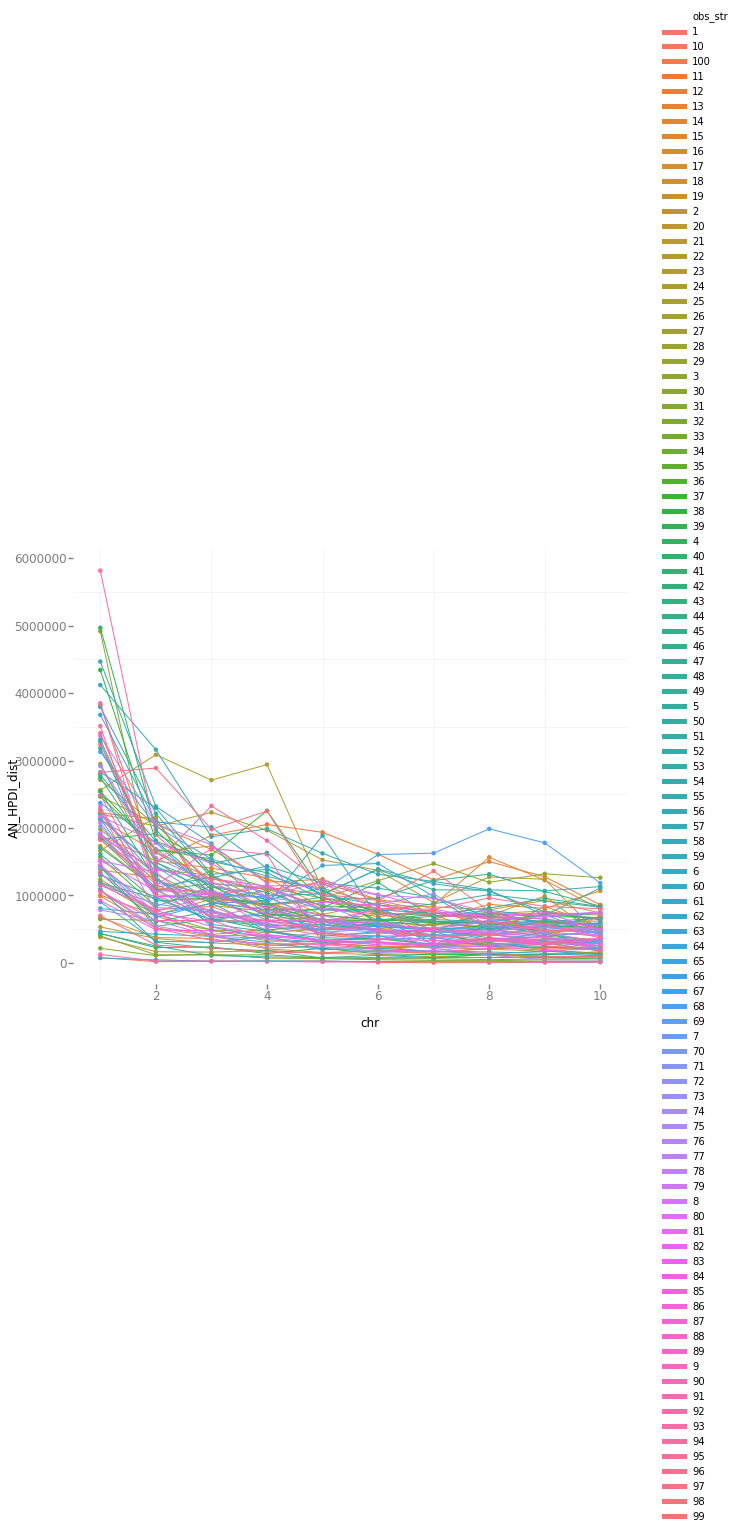

<ggplot: (-9223372029279117645)>


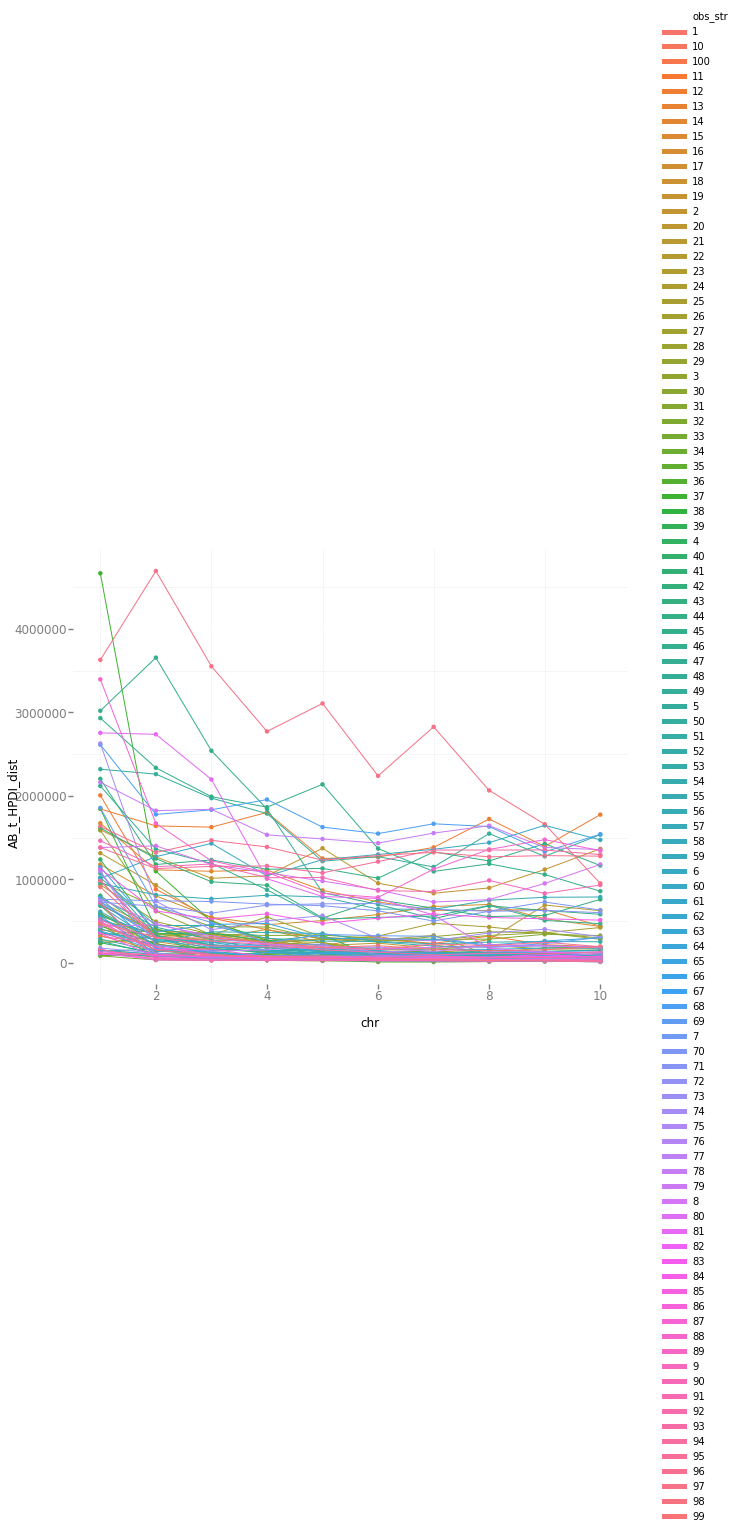

<ggplot: (-9223372029299193642)>


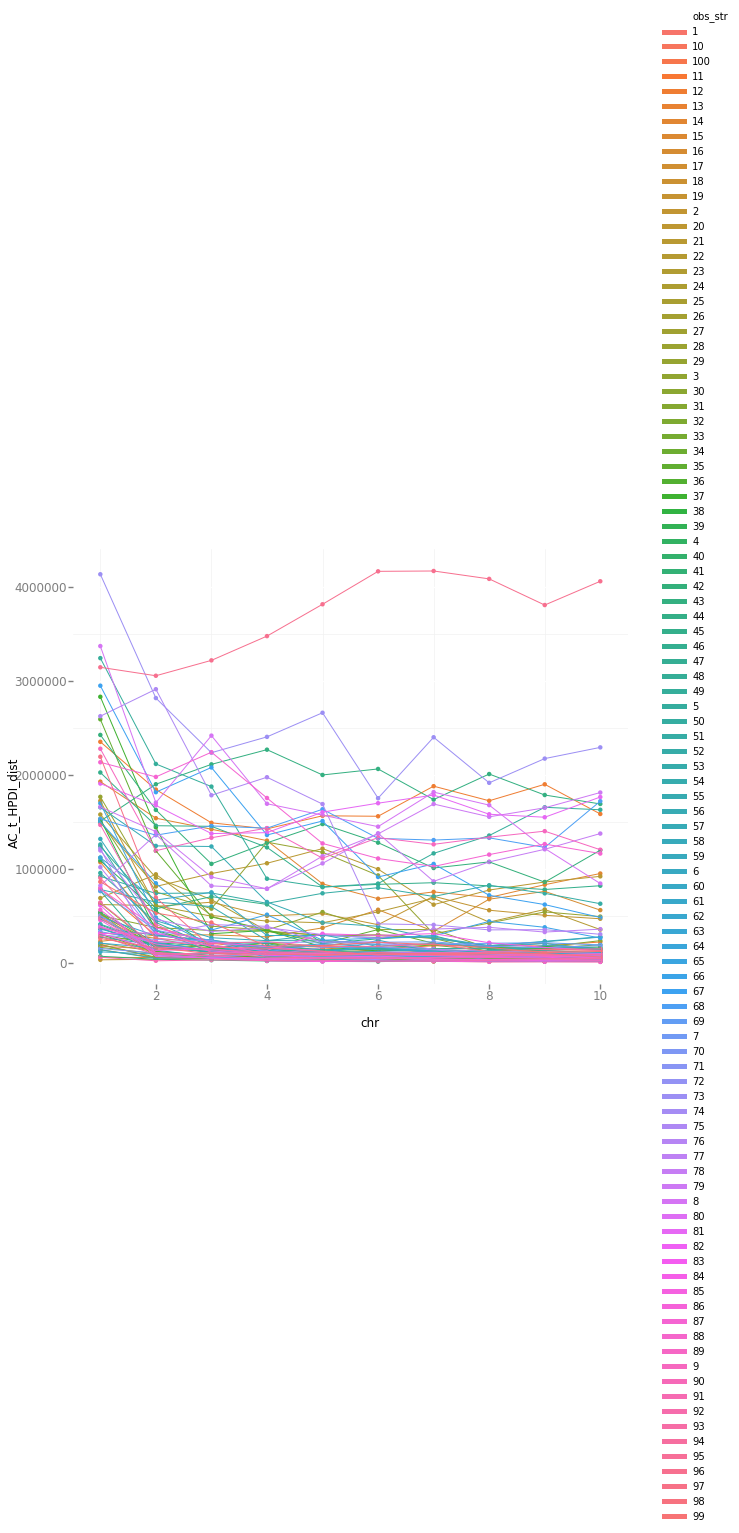

<ggplot: (-9223372029285718668)>


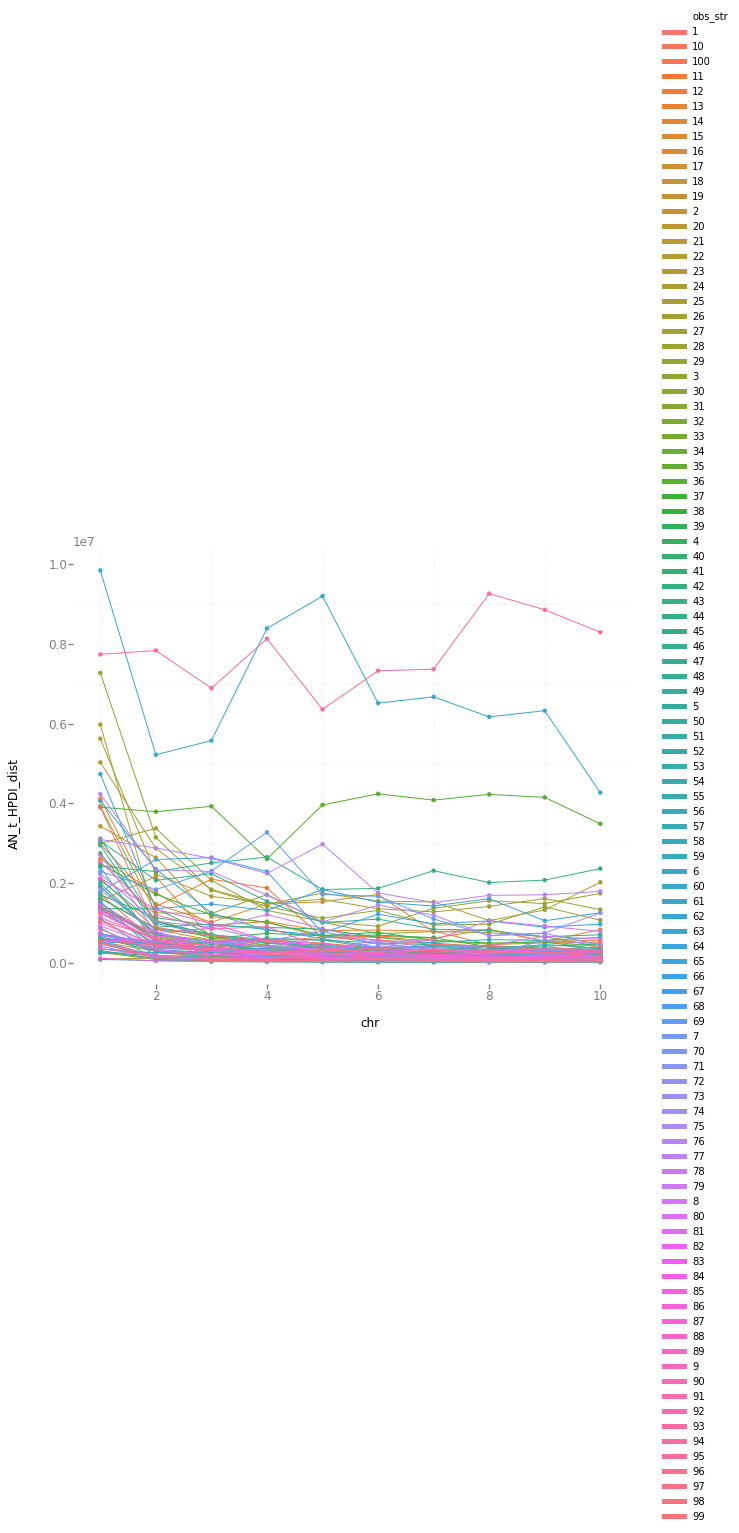

<ggplot: (7607674190)>


In [356]:
for param in parameters:
    HPDI_dist_name = '{}_HPDI_dist'.format(param)
    plot = lineplot(param, combined_PosteriorCharacteristics_observed_df, HPDI_dist_name)    
    print(plot)

### Posterior Densities

Example of posterior density of from one observed set.

In [ ]:
virdis_colors = []

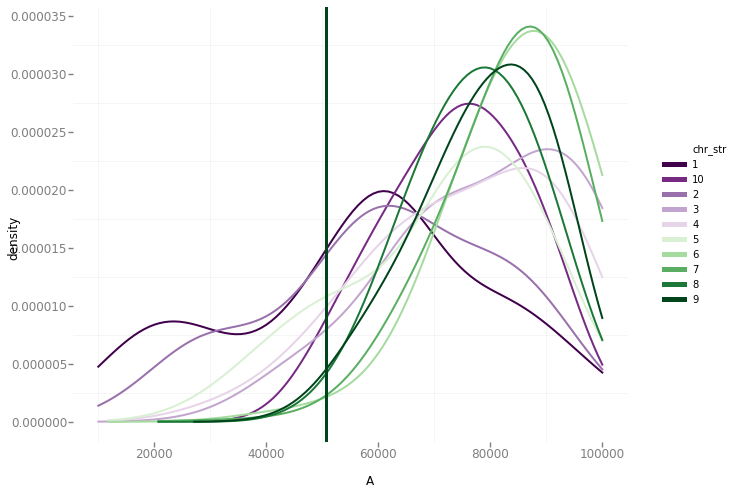

<ggplot: (-9223372029290513818)>


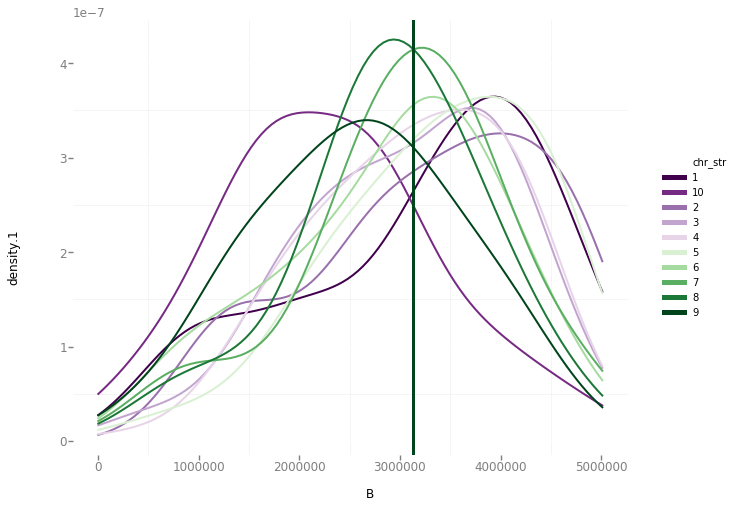

<ggplot: (7566701260)>


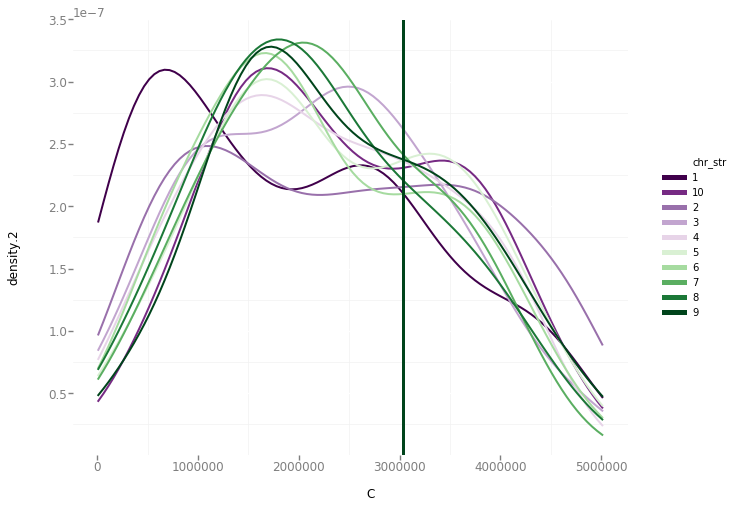

<ggplot: (7569095965)>


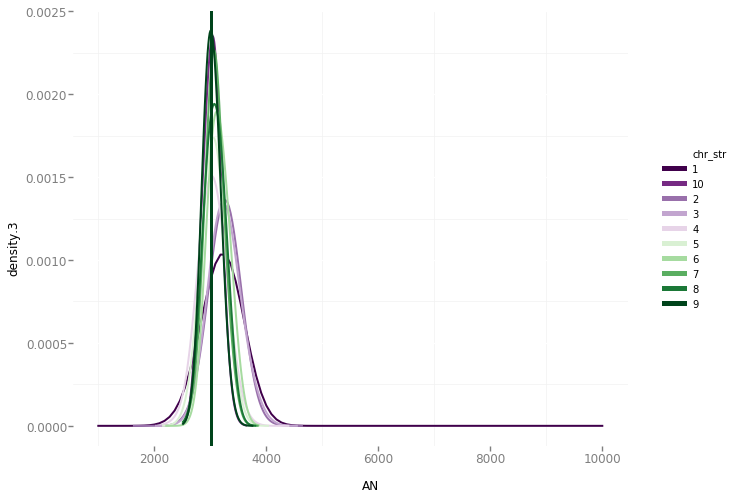

<ggplot: (7575474219)>


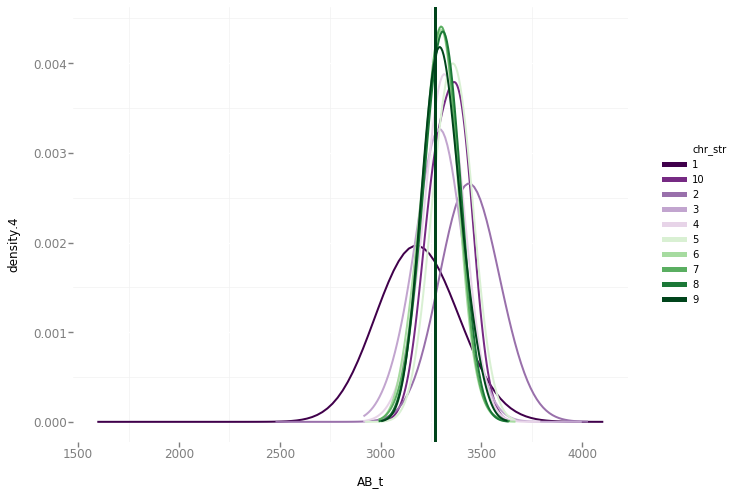

<ggplot: (7567963933)>


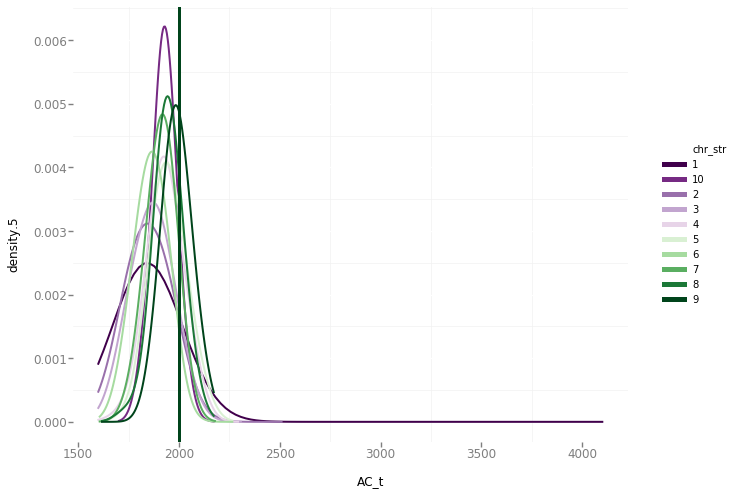

<ggplot: (7567695757)>


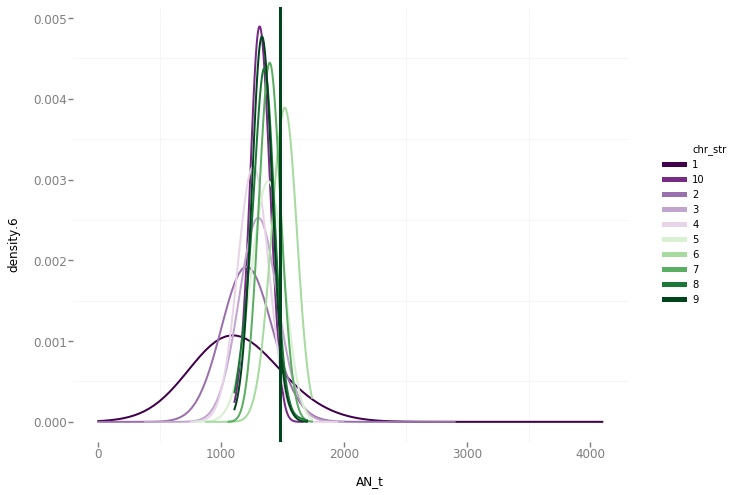

<ggplot: (-9223372029293566064)>


In [277]:
PosteriorDensities_obs1_df = combined_PosteriorDensities_df.loc[combined_PosteriorDensities_df['obs'] == 1]
true_values_df = combined_PosteriorCharacteristics_observed_df.loc[combined_PosteriorCharacteristics_observed_df['obs'] == 1].loc[combined_PosteriorCharacteristics_observed_df['chr'] == 1]

for param in parameters:
    plot = density_plot(param, PosteriorDensities_obs1_df, true_values_df[param])
    print(plot)

### Power to detect $N_1 > N_2$

Distribution of true $B-C$

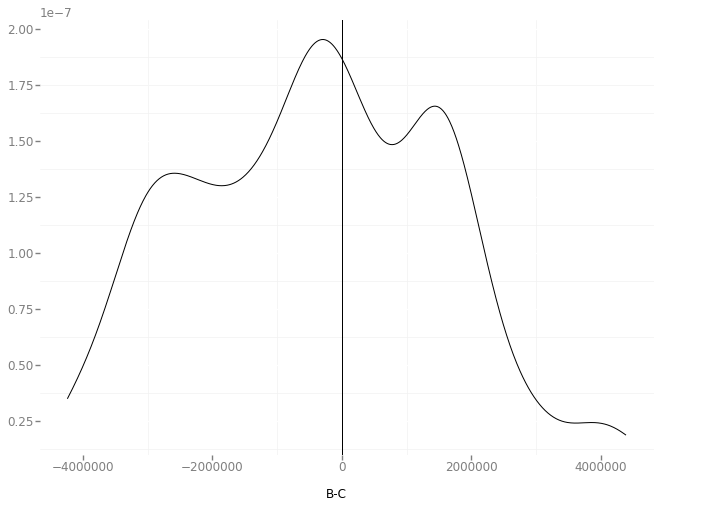

<ggplot: (7558677126)>

In [362]:
ggplot(aes(x = 'B-C'), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_density() + \
        geom_vline(x=0) + \
        theme_bw()

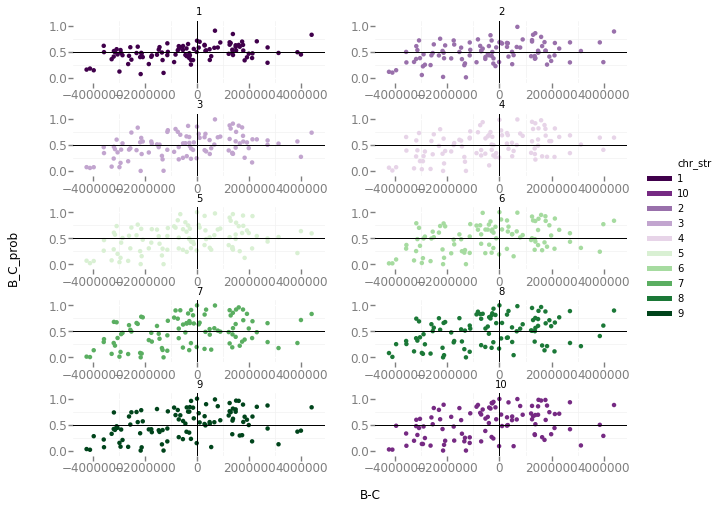

<ggplot: (7564146282)>

In [377]:
ggplot(aes(x = 'B-C', y = 'B_C_prob', color = 'chr_str'), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_point() + \
        geom_vline(x=0, color = 'black') + \
        geom_hline(y=0.5, color = 'black') + \
        facet_wrap('chr', ncol=2) + \
        scale_color_brewer(type='div', palette=2) +  \
        theme_bw()

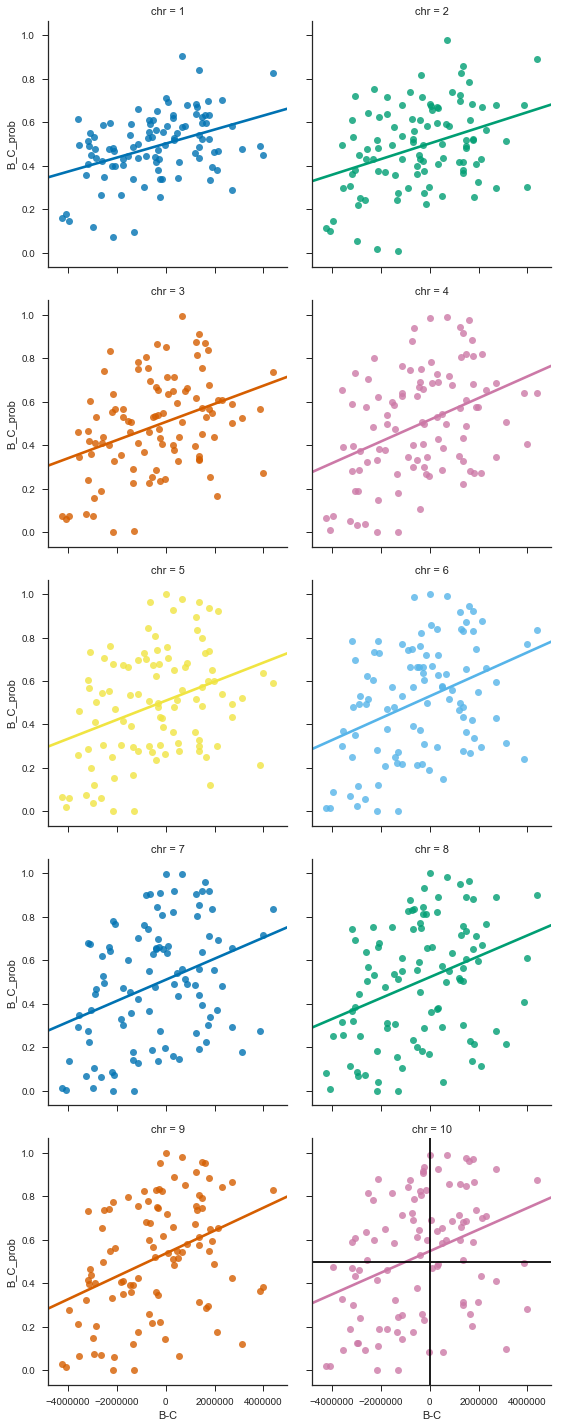

In [411]:
sns.lmplot(x="B-C", y="B_C_prob", col="chr", hue="chr", data=combined_PosteriorCharacteristics_observed_df,col_wrap=2, ci=None, palette="colorblind", size=4)
plt.axvline(0, color = 'black')
plt.axhline(0.5, color = 'black')

In [16]:
def calc_confusion_matrix(df, chrom, prob):
    confusion = {}
    act_B_ls_C = df['B-C'] < 0
    act_B_gr_C = df['B-C'] > 0
    pred_B_gr_C = df['B_C_prob'] > prob
    pred_B_ls_C = df['B_C_prob'] < prob
        
    confusion['act_B_ls_C_pred_B_gr_C'] = len(df[(df.chr == chrom) & act_B_ls_C  & pred_B_gr_C])
    confusion['act_B_ls_C_pred_B_ls_C'] = len(df[(df.chr == chrom) & act_B_ls_C  & pred_B_ls_C])
    confusion['act_B_gr_C_pred_B_gr_C'] = len(df[(df.chr == chrom) & act_B_gr_C  & pred_B_gr_C])
    confusion['act_B_gr_C_pred_B_ls_C'] = len(df[(df.chr == chrom) & act_B_gr_C  & pred_B_ls_C])   
    confusion['chr'] = chrom
    confusion['prob'] = str(prob)
        
    return confusion

df_list = []
prob_list = [0.5, 0.6, 0.7, 0.8, 0.9]
for chrom in chrom_list:
    for prob in prob_list:
        confusion = calc_confusion_matrix(combined_PosteriorCharacteristics_observed_df, chrom, prob)
        df_chrom = pd.DataFrame(confusion, index = [0])
        df_list.append(df_chrom)
confusion_df = pd.concat(df_list)
confusion_df['correct'] = confusion_df['act_B_gr_C_pred_B_gr_C'] + confusion_df['act_B_ls_C_pred_B_ls_C']
confusion_df['incorrect'] = confusion_df['act_B_ls_C_pred_B_gr_C'] + confusion_df['act_B_gr_C_pred_B_ls_C']
confusion_df.head()

act_B_gr_C_pred_B_gr_C  act_B_gr_C_pred_B_ls_C  act_B_ls_C_pred_B_gr_C  \
0                      27                      14                      19   
0                      15                      26                       6   
0                       4                      37                       1   
0                       3                      38                       0   
0                       1                      40                       0   

   act_B_ls_C_pred_B_ls_C  chr prob  correct  incorrect  
0                      40    1  0.5       67         33  
0                      53    1  0.6       68         32  
0                      58    1  0.7       62         38  
0                      59    1  0.8       62         38  
0                      59    1  0.9       60         40

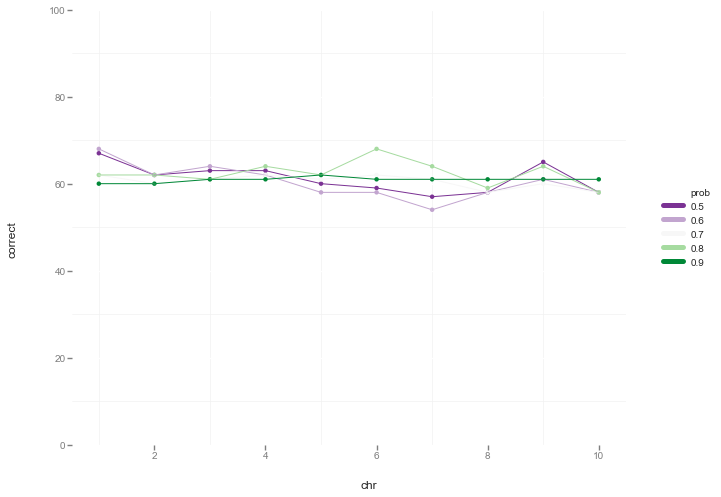

<ggplot: (7594757980)>

In [520]:
ggplot(aes(x = 'chr', y = 'correct', colour = 'prob'), data = confusion_df) + \
        geom_point() + \
        geom_line(size = 2) + \
        ylim(0,100) + \
        scale_color_brewer(type='div', palette=2) +  \
        theme_bw()

Distribution of probability B>C when B<C

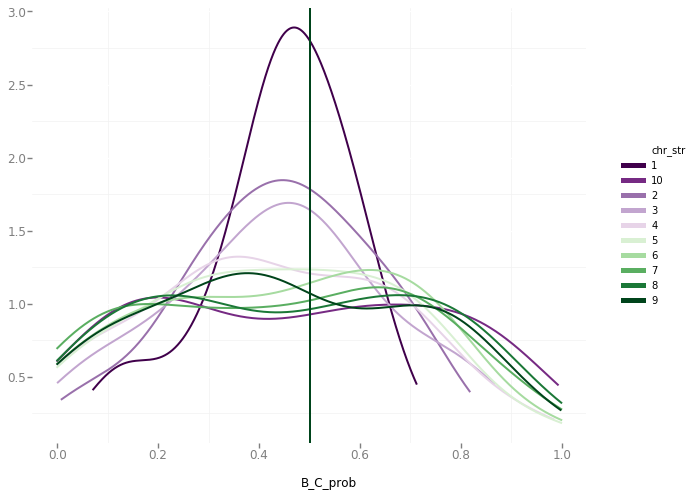

<ggplot: (7576295765)>

In [380]:
ggplot(aes(x = 'B_C_prob', color = 'chr_str'), data = combined_PosteriorCharacteristics_observed_df[combined_PosteriorCharacteristics_observed_df['B-C'] < 0]) + \
        geom_density(size = 2) + \
        geom_vline(x=0.5, size = 2) + \
        scale_color_brewer(type='div', palette=2) + \
        theme_bw()

Distribution of probability B>C when B>C

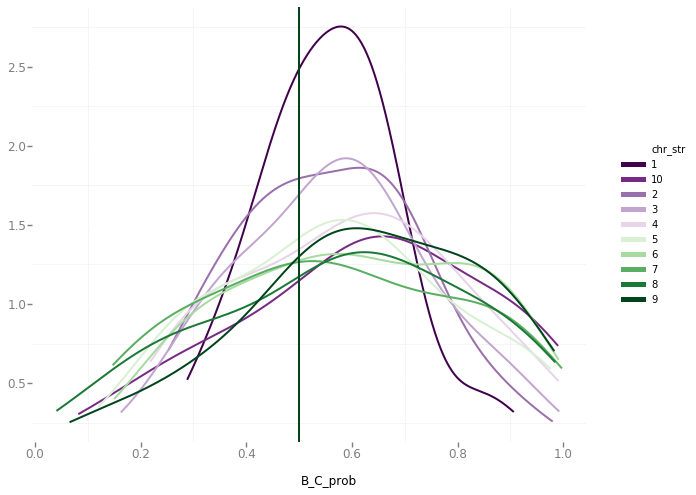

<ggplot: (-9223372029277546906)>

In [382]:
ggplot(aes(x = 'B_C_prob', color = 'chr_str'), data = combined_PosteriorCharacteristics_observed_df[combined_PosteriorCharacteristics_observed_df['B-C'] > 0]) + \
        geom_density(size = 2) + \
        geom_vline(x=0.5, size = 2) + \
        scale_color_brewer(type='div', palette=2) + \
        theme_bw()

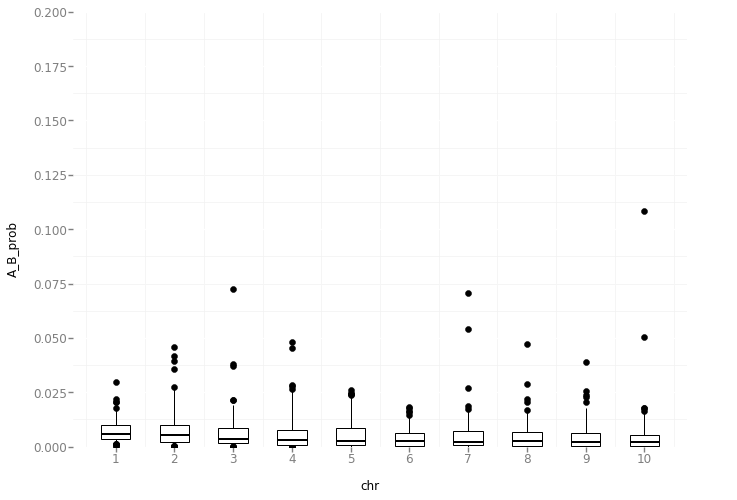

<ggplot: (-9223372029246818479)>

In [337]:
ggplot(aes(y = 'A_B_prob', x = 'chr'), data = combined_PosteriorCharacteristics_observed_df[combined_PosteriorCharacteristics_observed_df['A-B'] < 0]) + \
        geom_boxplot() + \
        ylim(0,.2) + \
        theme_bw()

# Plotting issues

## Remove legend
https://github.com/yhat/ggpy/issues/629

In [130]:
ggplot(aes(x = 'chr', y = '{}_estimate_dist'.format(param), colour='obs'), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_point() + \
        geom_line() + \
        theme(legend.position='none') + \
        theme_bw()

SyntaxError: keyword can't be an expression (<ipython-input-130-28dd22af5934>, line 1)

In [134]:
ggplot(aes(x = 'chr', y = '{}_estimate_dist'.format(param), colour='obs'), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_point() + \
        geom_line() + \
        scale_fill_discrete(guide=FALSE) + \
        theme_bw()

NameError: name 'scale_fill_discrete' is not defined

In [136]:
ggplot(aes(x = 'chr', y = '{}_estimate_dist'.format(param), colour='obs'), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_point() + \
        geom_line() + \
        guides(colour=FALSE) + \
        theme_bw()

NameError: name 'guides' is not defined